In [ ]:
!pip install mne


In [ ]:
!pip install vtk

In [ ]:
!pip install pyvista

In [ ]:
!pip install autoreject

In [ ]:
!pip install h5io

In [ ]:
!pip install xgboost

In [ ]:
!pip install mne-icalabel

In [ ]:
pip install -U numpy

In [1]:
import mne
from mne_icalabel import label_components
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from mne import io, pick_types, read_events, Epochs, EvokedArray, create_info
from mne.preprocessing import Xdawn
from collections import OrderedDict
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, LeakyReLU
from tensorflow.keras.layers import Flatten, Activation, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence


import glob
matplotlib.use('Qt5Agg')
mne.set_config('MNE_BROWSE_RAW_SIZE','20,20')
%matplotlib qt
mne.viz.set_3d_backend("notebook")
plt.rcParams["figure.figsize"] = [20,20]
mne.set_log_level('warning')

Using notebook 3d backend.



In [ ]:
#glob.glob('C:/Users/vs21542/EEG/ane_SD_EMG_1010/ane_SD_EMG_1010/*.vhdr')

In [2]:
#raw_ec = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1022/ane_SD_EMG_1022_awake_rest_ec.vhdr', preload=True)
raw_ec = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1036/ane_SD_EMG_1036_awake_rest_ec.vhdr', preload=True)

#raw_eo = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1022/ane_SD_EMG_1022_awake_rest_eo.vhdr', preload=True)
raw_eo = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1036/ane_SD_EMG_1036_awake_rest_eo.vhdr', preload=True)

#raw_sed_1 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1022/ane_SD_EMG_1022_SED_1_rest.vhdr', preload=True)
raw_sed_1 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1036/ane_SD_EMG_1036_SED_1_rest.vhdr', preload=True)

#raw_sed_2 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1022/ane_SD_EMG_1022_SED_2_rest.vhdr', preload=True)
raw_sed_2 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1036/ane_SD_EMG_1036_SED_2_rest.vhdr', preload=True)

#raw_sed_3 = mne.io.read_raw_brainvision('C:/Users/vs21542/EEG/ane_SD_EMG_1022/ane_SD_EMG_1022_SED_3_rest.vhdr', preload=True)
# raw_sed_3 = mne.io.read_raw_brainvision('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1033/ane_SD_EMG_1033_SED_3_rest.vhdr', preload=True)

In [ ]:
raw_eo.info

In [ ]:
raw_ec.info

In [ ]:
raw_sed_1.info

##### 1.) Sampling rate is 5000 Hz (i.e., EEG data were sampled 5000 times per second, so we have a data point every 2 ms)

##### 2.) The data were filtered during data collection between 0.00–1000 Hz. (from lowpass to highpass) 

In [ ]:
raw_eo_data = raw_eo.get_data()
print(raw_eo_data.shape)

In [5]:
raw_ec.__dict__

{'_last_samps': array([1521299]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: Iz, O2, Oz, O1, PO8, PO4, POz, PO3, PO7, P8, P6, P4, P2, Pz, P1, ...
  chs: 64 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 1000.0 Hz
  meas_date: 2020-01-20 16:22:27 UTC
  nchan: 64
  projs: []
  sfreq: 5000.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07,
        5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07, 5.e-07]),
 '_raw_extras': [{'offsets': No

In [ ]:
raw_ec.__dict__

In [ ]:
raw_sed_1.__dict__

In [4]:
# Marking EOG and EMG channels
raw_eo.set_channel_types({'VEOG': 'eog'})
raw_eo.set_channel_types({'HEOG': 'eog'})
# raw_eo.set_channel_types({'EMG': 'emg'})

raw_ec.set_channel_types({'VEOG': 'eog'})
raw_ec.set_channel_types({'HEOG': 'eog'})
# raw_ec.set_channel_types({'EMG': 'emg'})

raw_sed_1.set_channel_types({'VEOG': 'eog'})
raw_sed_1.set_channel_types({'HEOG': 'eog'})
# raw_sed_1.set_channel_types({'EMG': 'emg'})

raw_sed_2.set_channel_types({'VEOG': 'eog'})
raw_sed_2.set_channel_types({'HEOG': 'eog'})
# raw_sed_2.set_channel_types({'EMG': 'emg'})

# raw_sed_3.set_channel_types({'VEOG': 'eog'})
# raw_sed_3.set_channel_types({'HEOG': 'eog'})
# raw_sed_3.set_channel_types({'EMG': 'emg'})

<RawBrainVision | ane_SD_EMG_1036_SED_2_rest.eeg, 64 x 134900 (27.0 s), ~65.9 MB, data loaded>

In [ ]:
# raw_eo.info['bads'] += ['VEOG','HEOG','EMG']
# raw_ec.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_1.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_2.info['bads'] += ['VEOG','HEOG','EMG']
# raw_sed_3.info['bads'] += ['VEOG','HEOG','EMG']  

In [ ]:
print(raw_eo.plot(n_channels=62))

In [ ]:
print(raw_ec.plot(n_channels=62))

In [ ]:
print(raw_sed_1.plot(n_channels=62))

In [ ]:
print(raw_sed_2.plot(n_channels=62))

In [ ]:
print(raw_sed_3.plot(n_channels=62))

In [ ]:
print(raw_eo.plot(start=10, duration=20, n_channels=65))

In [ ]:
print(raw_sed_2.plot(start=0, duration=5, n_channels=65, color='brown'))

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
start_time = 15
end_time = 16

ax.plot(raw_sed_2.get_data(picks='CP1', tmin=start_time, tmax=end_time).T)
plt.show()

In [ ]:
raw_eo.info['ch_names']

In [ ]:
raw_sed_1.info['ch_names']

In [5]:
# EEG signals topography
montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
raw_eo.set_montage(montage, on_missing='ignore')
raw_ec.set_montage(montage, on_missing='ignore')
raw_sed_1.set_montage(montage, on_missing='ignore')
raw_sed_2.set_montage(montage, on_missing='ignore')
# raw_sed_3.set_montage(montage, on_missing='ignore')

<RawBrainVision | ane_SD_EMG_1036_SED_2_rest.eeg, 64 x 134900 (27.0 s), ~66.0 MB, data loaded>

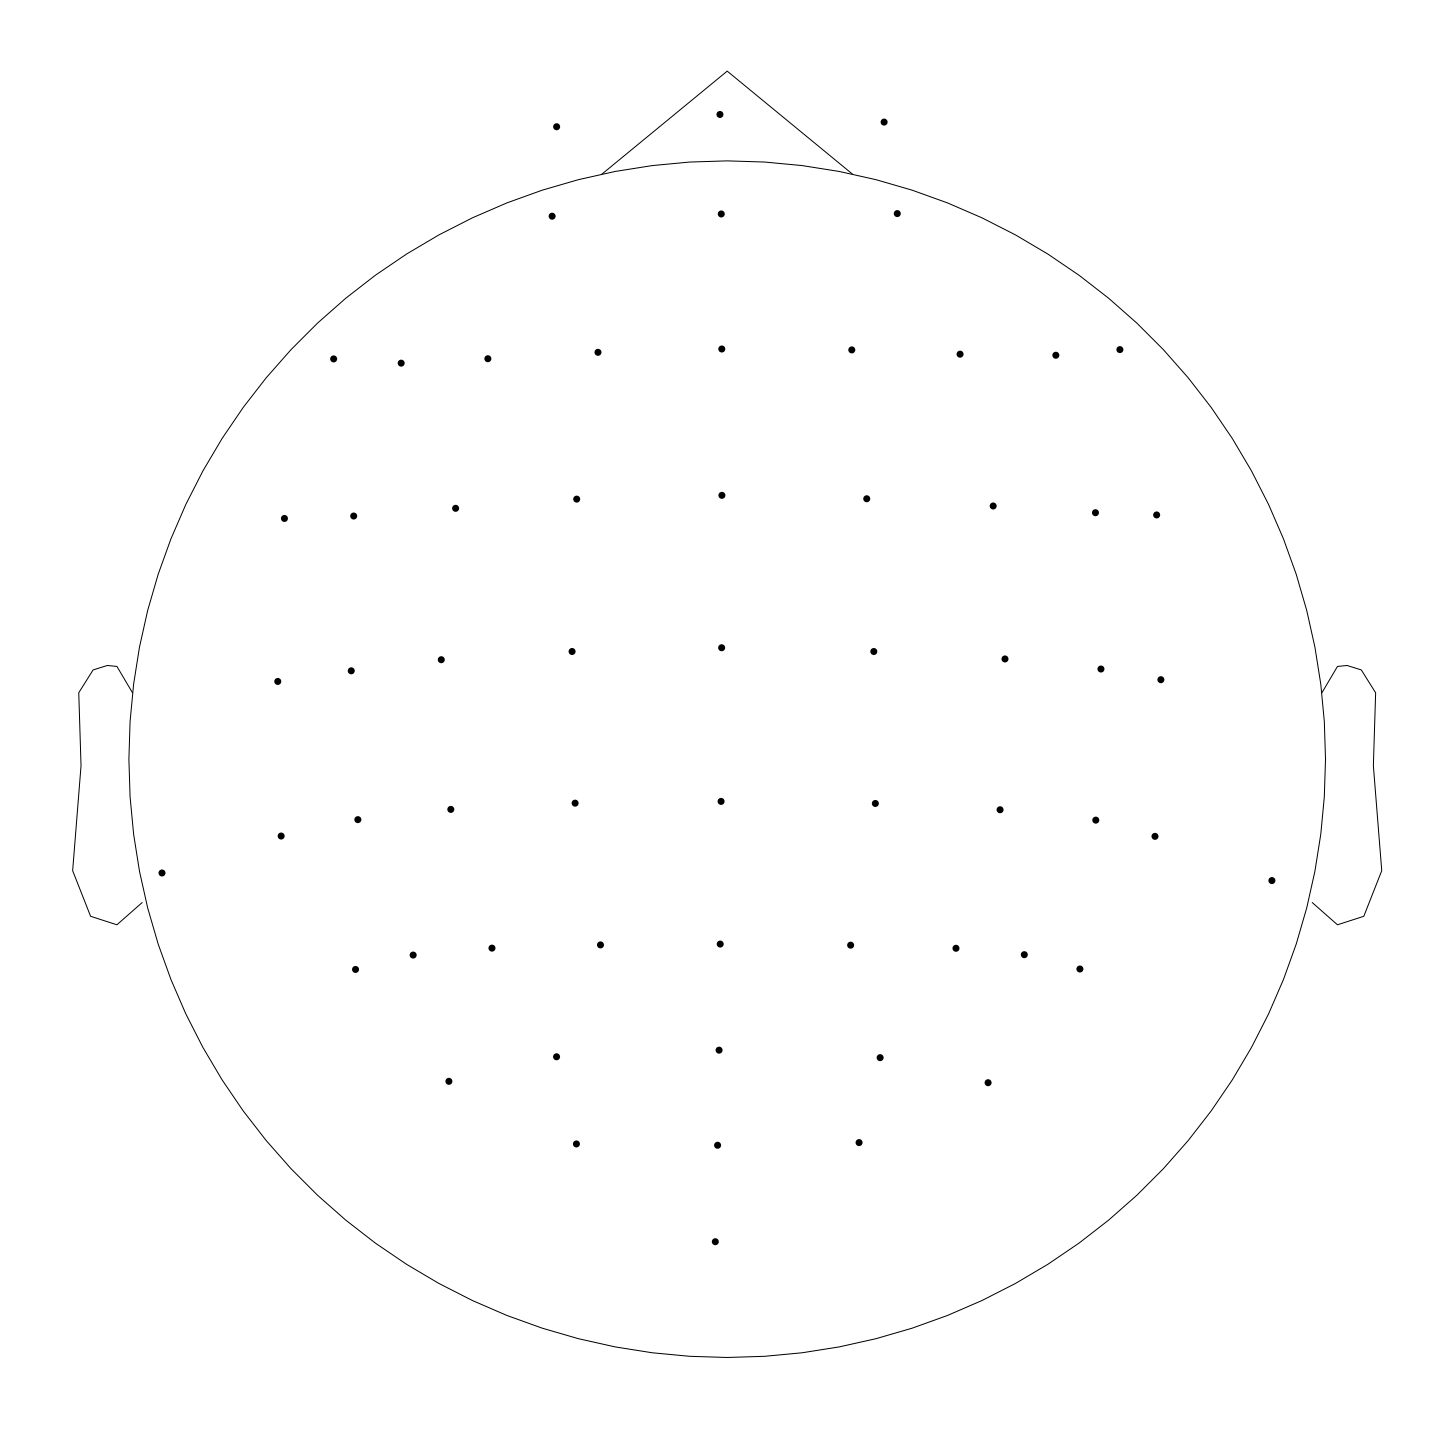

In [6]:
raw_sed_1.plot_sensors(ch_type='eeg')

In [ ]:
raw_eo.info['bads']

In [ ]:
print("Eye Open Annotations : ", mne.events_from_annotations(raw_eo))
print("Eye Closed Annotations : ", mne.events_from_annotations(raw_ec))
print("Sed 1 Annotations : ", mne.events_from_annotations(raw_sed_1))
print("Sed 2 Annotations : ", mne.events_from_annotations(raw_sed_2))
print("Sed 3 Annotations : ", mne.events_from_annotations(raw_sed_3))

In [ ]:
events_eo, event_id_eo = mne.events_from_annotations(raw_eo)
mne.viz.plot_events(events_eo, event_id = event_id_eo, sfreq = raw_eo.info['sfreq'])

In [ ]:
events_ec, event_id_ec = mne.events_from_annotations(raw_ec)
mne.viz.plot_events(events_ec, event_id = event_id_ec, sfreq = raw_ec.info['sfreq'])

In [ ]:
events_sed_1, event_id_sed_1 = mne.events_from_annotations(raw_sed_1)
mne.viz.plot_events(events_sed_1, event_id = event_id_sed_1, sfreq = raw_sed_1.info['sfreq'])

In [ ]:
events_sed_2, event_id_sed_2 = mne.events_from_annotations(raw_sed_2)
mne.viz.plot_events(events_sed_2, event_id = event_id_sed_2, sfreq = raw_sed_2.info['sfreq'])

In [ ]:
events_sed_3, event_id_sed_3 = mne.events_from_annotations(raw_sed_3)
mne.viz.plot_events(events_sed_3, event_id = event_id_sed_3, sfreq = raw_sed_3.info['sfreq'])

In [ ]:
raw_eo.to_data_frame()

In [ ]:
fig, ax = plt.subplots(5)
raw_eo.plot_psd(ax = ax[0],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_ec.plot_psd(ax = ax[1],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_sed_1.plot_psd(ax = ax[2],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)
raw_sed_2.plot_psd(ax = ax[3],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100, 
                show=False, 
                average=True)
raw_sed_3.plot_psd(ax = ax[4],
                area_mode='range', 
                fmin = 0.0,
                fmax = 100, 
                show=False, 
                average=True)

ax[0].set_title("PSD for eye opened")
ax[1].set_title("PSD for eye closed")
ax[2].set_title("PSD for Sed 1")
ax[3].set_title("PSD for Sed 2")
ax[4].set_title("PSD for Sed 3")

fig.set_tight_layout(True)

In [7]:
# Applying downsampling of from sampling frequency 5000 Hz to 500 Hz.
raw_eo_downsampled = raw_eo.copy().resample(sfreq=500)
raw_ec_downsampled = raw_ec.copy().resample(sfreq=500)
raw_sed_1_downsampled = raw_sed_1.copy().resample(sfreq=500)
raw_sed_2_downsampled = raw_sed_2.copy().resample(sfreq=500) 
# raw_sed_3_downsampled = raw_sed_3.copy().resample(sfreq=500)

In [ ]:
raw_eo_downsampled.plot(n_channels=62)
raw_ec_downsampled.plot(n_channels=62)
raw_sed_1_downsampled.plot(n_channels=62)
raw_sed_2_downsampled.plot(n_channels=62)
# raw_sed_3_downsampled.plot(n_channels=62)

In [8]:
#Method for Bandpass filter
def filter_raw_data(raw):
    low_cut = 0.1
    hi_cut  = 30
    raw_filt = raw.copy().filter(low_cut, hi_cut)
    return raw_filt

In [ ]:
def filter_psd(raw_filt):
    raw_filt.plot_psd(
                area_mode='range', 
                fmin = 0.0,
                fmax = 100,
                show=False, 
                average=True)

In [9]:
#Applying Bandpass filter on downsampled raw data
raw_eo_filt = filter_raw_data(raw_eo_downsampled)
raw_ec_filt = filter_raw_data(raw_ec_downsampled)
raw_sed_1_filt = filter_raw_data(raw_sed_1_downsampled)
raw_sed_2_filt = filter_raw_data(raw_sed_2_downsampled)
# raw_sed_3_filt = filter_raw_data(raw_sed_3_downsampled)

In [ ]:
filter_psd(raw_eo_filt)
filter_psd(raw_ec_filt)
filter_psd(raw_sed_1_filt)
filter_psd(raw_sed_2_filt)
filter_psd(raw_sed_3_filt)

# Filtering in time domain

In [ ]:
raw_eo.plot(start=10, duration=20, n_channels=62)

In [ ]:
#raw_eo.save('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1016/' + '1016-raw_eo.fif', overwrite=True)

In [ ]:
raw_eo_filt.plot(start=10, duration=20, n_channels=62)

In [ ]:
raw_sed_1_filt.plot(start=15, duration=5, n_channels=62)

In [ ]:
#raw_eo_filt.save('D:/Vikas/Data Science/Dissertation/Dataset/Kongsberg_anesthesia_data/EEG/ane_SD_EMG_1016/' + '1016-filt-raw_eo.fif', overwrite=True)

In [ ]:
def ica_raw_data(raw):
    ica_low_cut = 1.0       # For ICA, we filter out more low-frequency power
    ica_hi_cut  = 30
    raw_ica = raw.copy().filter(ica_low_cut, ica_hi_cut)
    return raw_ica

In [ ]:
raw_eo_ica = ica_raw_data(raw_eo_filt)
raw_ec_ica = ica_raw_data(raw_ec_filt)
raw_sed_1_ica = ica_raw_data(raw_sed_1_filt)
raw_sed_2_ica = ica_raw_data(raw_sed_2_filt)
raw_sed_3_ica = ica_raw_data(raw_sed_3_filt)

In [ ]:
#events_raw_eo_ica, events_raw_eo_ica_id = mne.events_from_annotations(raw_eo_filt)

In [ ]:
def ica_epoch_data(raw_data):    
# Break raw data into 1 s epochs
    t_step = 1.0
    events_raw_ica = mne.make_fixed_length_events(raw_data, duration = t_step)
    epochs_raw_ica = mne.Epochs(raw_data, events_raw_ica,
                        tmin=0.0, tmax=t_step,
                        preload=True,
                        baseline=None)
    return epochs_raw_ica

In [ ]:
raw_eo_ica_epoch = ica_epoch_data(raw_eo)
raw_ec_ica_epoch = ica_epoch_data(raw_ec)
raw_sed_1_ica_epoch = ica_epoch_data(raw_sed_1)
raw_sed_2_ica_epoch = ica_epoch_data(raw_sed_2)
raw_sed_3_ica_epoch = ica_epoch_data(raw_sed_3)

In [ ]:
raw_sed_1_ica_epoch = ica_epoch_data(raw_sed_1_filt)

In [ ]:
raw_eo_ica.plot()

In [ ]:
raw_ec_ica_epoch.plot()

In [ ]:
raw_sed_1_ica_epoch.plot()

In [ ]:
raw_sed_2_ica_epoch.plot()

In [ ]:
raw_sed_3_ica_epoch.plot()

In [ ]:
from autoreject import get_rejection_threshold
def reject_thres_epoch(epoch_data):
    reject = get_rejection_threshold(epoch_data)
    return reject

In [ ]:
reject_eo_thres = reject_thres_epoch(raw_eo_ica_epoch)
print("Reject threshold eye open ",reject_eo_thres)
reject_ec_thres = reject_thres_epoch(raw_ec_ica_epoch)
print("Reject threshold eye closed ",reject_ec_thres)
reject_sed_1_thres = reject_thres_epoch(raw_sed_1_ica_epoch)
print("Reject threshold eye sed 1 ",reject_sed_1_thres)
reject_sed_2_thres = reject_thres_epoch(raw_sed_2_ica_epoch)
print("Reject threshold eye sed 2 ",reject_sed_2_thres)
reject_sed_3_thres = reject_thres_epoch(raw_sed_3_ica_epoch)
print("Reject threshold eye sed 3 ",reject_sed_3_thres)

In [ ]:
# def fit_ica(epoch_raw_ica, reject):
#     # ICA parameters
#     random_state = 42   # ensures ICA is reproducable each time it's run
#     ica_n_components = .99     # Specify n_components as a decimal to set % explained variance
#     t_step = 1.0

#     # Fit ICA
#     ica = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)
#     ica.fit(epoch_raw_ica,reject=reject,tstep=t_step) 

In [ ]:
# fit_ica(raw_eo_ica_epoch,reject_eo_thres)

In [10]:
# Intializing the ICA parameters
random_state = 42 
ica_n_components = .99
t_step = 1.0

In [11]:
# Picking only eeg channels data
picks_eo = mne.pick_types(raw_eo_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_ec = mne.pick_types(raw_ec_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_sed_1 = mne.pick_types(raw_sed_1_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
picks_sed_2 = mne.pick_types(raw_sed_2_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')
# picks_sed_3 = mne.pick_types(raw_sed_3_filt.info, meg=False, eeg=True, eog=False, emg=False, stim=False, exclude='bads')

In [12]:
# Fit ICA on eye open state data
ica_eo = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)
#ica_eo.fit(raw_eo_filt)
reconst_raw_eo = raw_eo_filt.copy()
ica_eo.fit(reconst_raw_eo, picks=picks_eo)

<ICA | raw data decomposition, method: fastica (fit in 17 iterations on 154260 samples), 6 ICA components explaining 99.0 % of variance (62 PCA components available), channel types: eeg, no sources marked for exclusion>

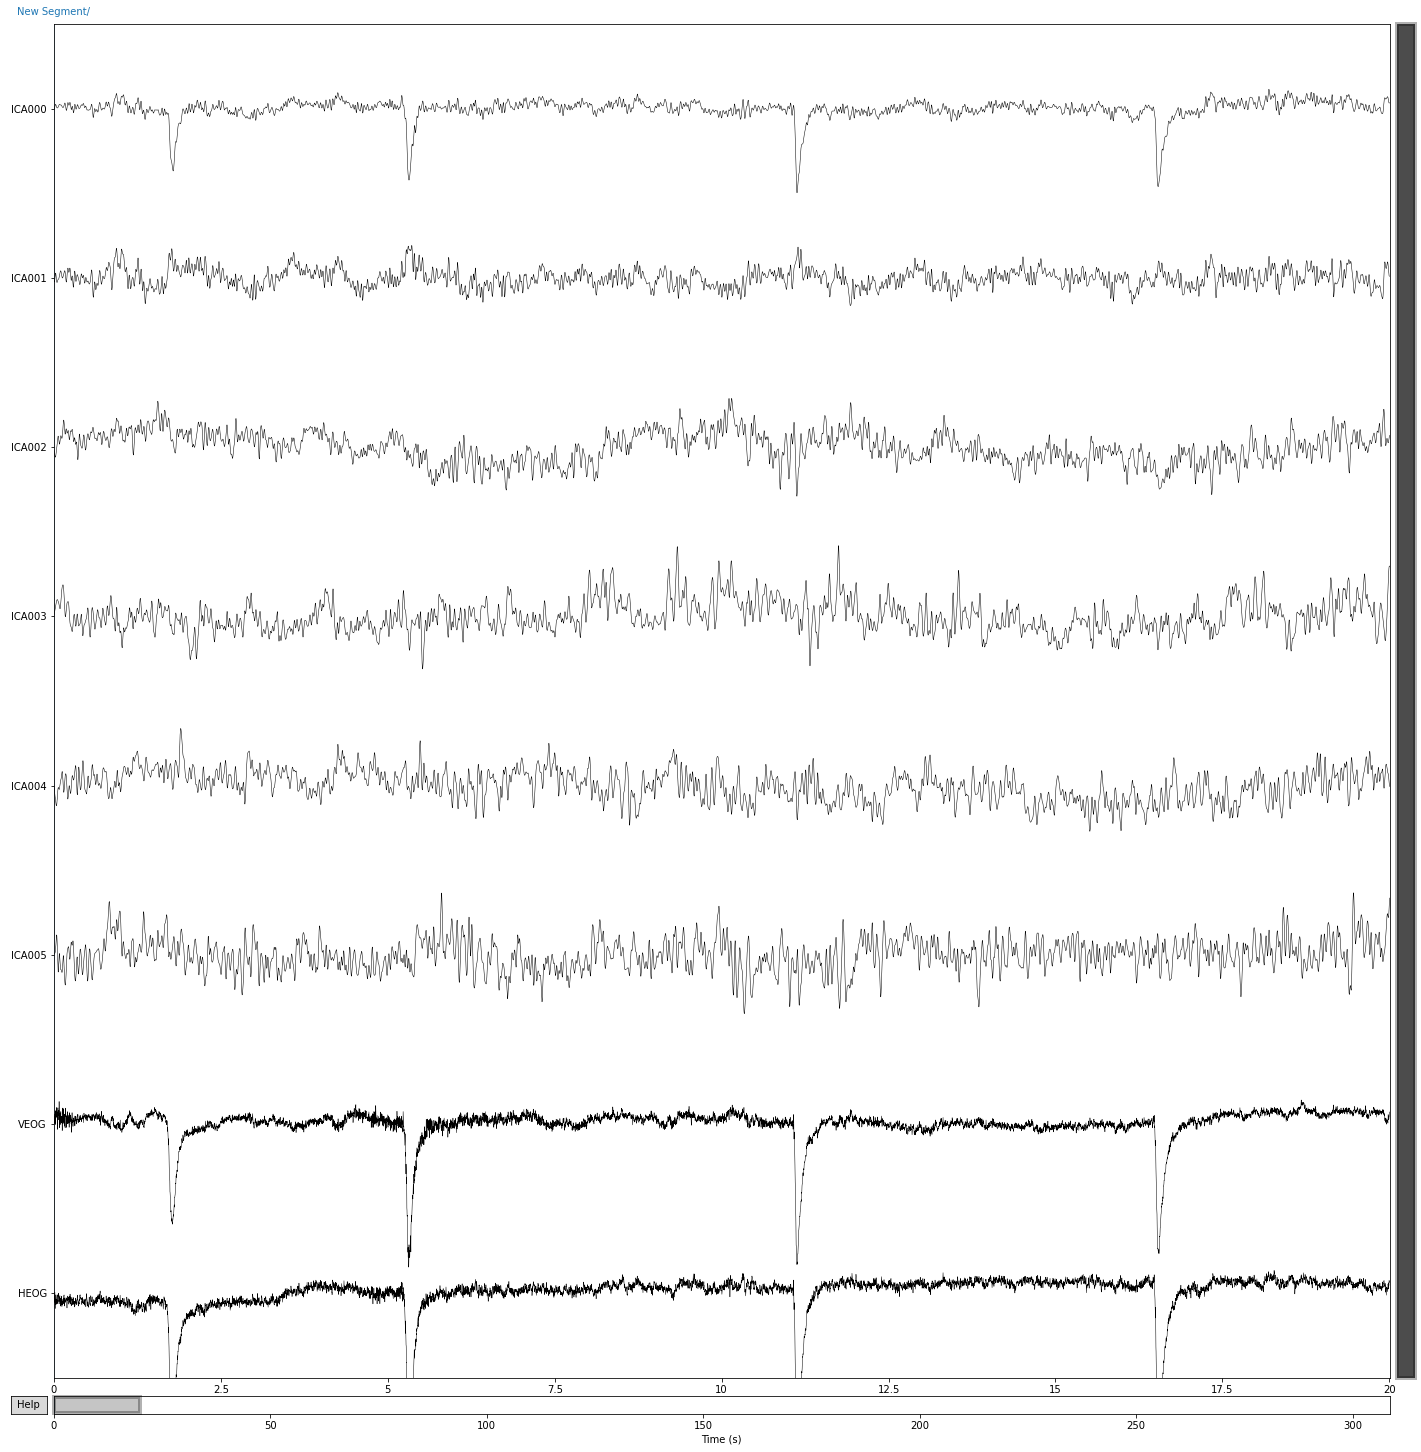

In [13]:
ica_eo.plot_sources(reconst_raw_eo)

In [14]:
from mne_icalabel import label_components
ica_comp_labels = label_components(reconst_raw_eo, ica_eo, method='iclabel')
ica_comp_labels

{'y_pred_proba': array([0.53560483, 0.6148931 , 0.75848603, 0.9920949 , 0.98361933,
        0.994507  ], dtype=float32),
 'labels': ['other', 'other', 'brain', 'brain', 'brain', 'brain']}

In [15]:
ica_eo.exclude = []

for i, each in enumerate(ica_comp_labels['labels']):
    if (each =='eye blink') or (each.endswith('noise')):
        ica_eo.exclude.append(i)

ica_eo.exclude

[]

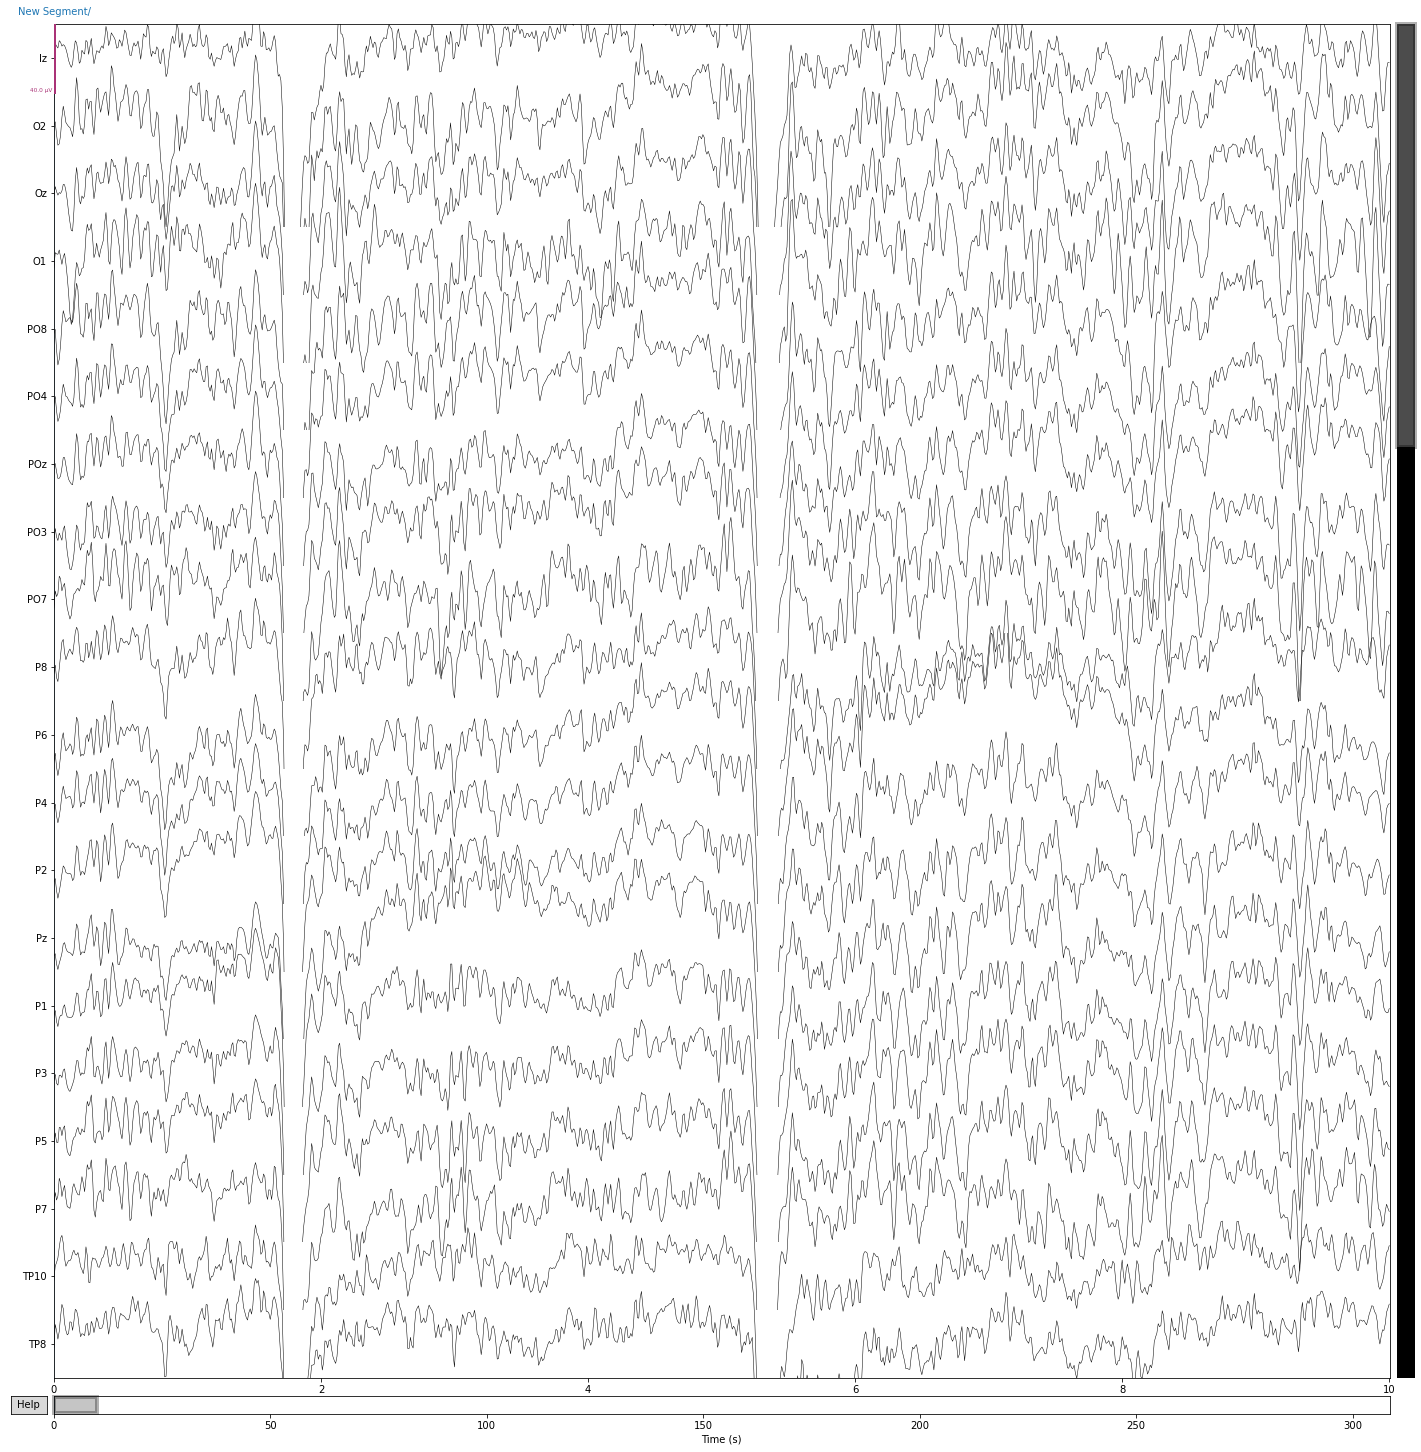

In [16]:
# Applying reconstructed data eye open state
ica_eo.apply(reconst_raw_eo, exclude = ica_eo.exclude).plot()

In [17]:
# Fit ICA on eye closed state
ica_ec = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_ec = raw_ec_filt.copy()

ica_ec.fit(reconst_raw_ec, picks=picks_ec)

<ICA | raw data decomposition, method: fastica (fit in 55 iterations on 152130 samples), 14 ICA components explaining 99.0 % of variance (62 PCA components available), channel types: eeg, no sources marked for exclusion>

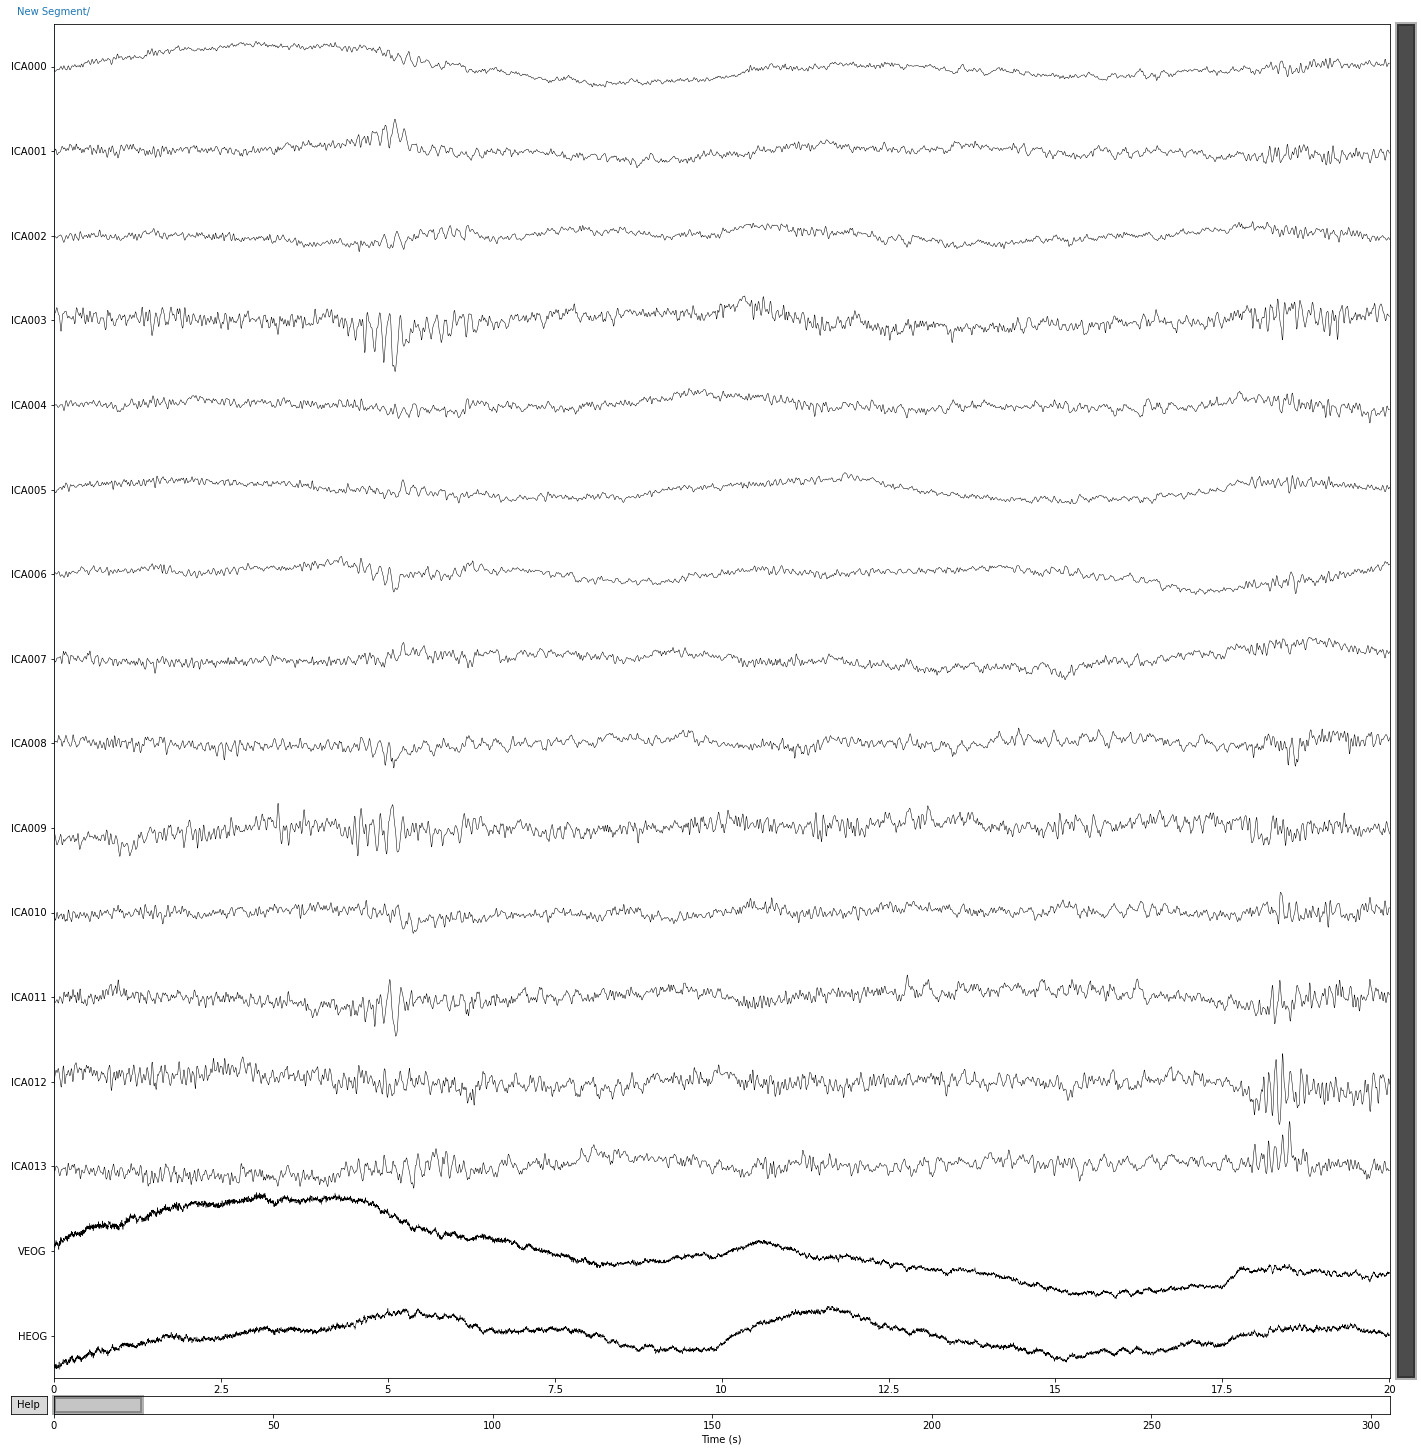

In [22]:
ica_ec.plot_sources(reconst_raw_ec)

In [18]:
ica_comp_labels_ec = label_components(reconst_raw_ec, ica_ec, method='iclabel')
ica_comp_labels_ec

{'y_pred_proba': array([0.8328648 , 0.41059154, 0.42088515, 0.97569036, 0.93087167,
        0.8301817 , 0.47765502, 0.70622563, 0.9929655 , 0.9805924 ,
        0.61551493, 0.87374496, 0.9963702 , 0.50374174], dtype=float32),
 'labels': ['other',
  'other',
  'other',
  'brain',
  'eye blink',
  'other',
  'brain',
  'brain',
  'brain',
  'brain',
  'other',
  'brain',
  'brain',
  'other']}

In [19]:
ica_ec.exclude = []

for i, each in enumerate(ica_comp_labels_ec['labels']):
    if (each =='eye blink') or (each.endswith('noise')):
        ica_ec.exclude.append(i)
        
ica_ec.exclude

[4]

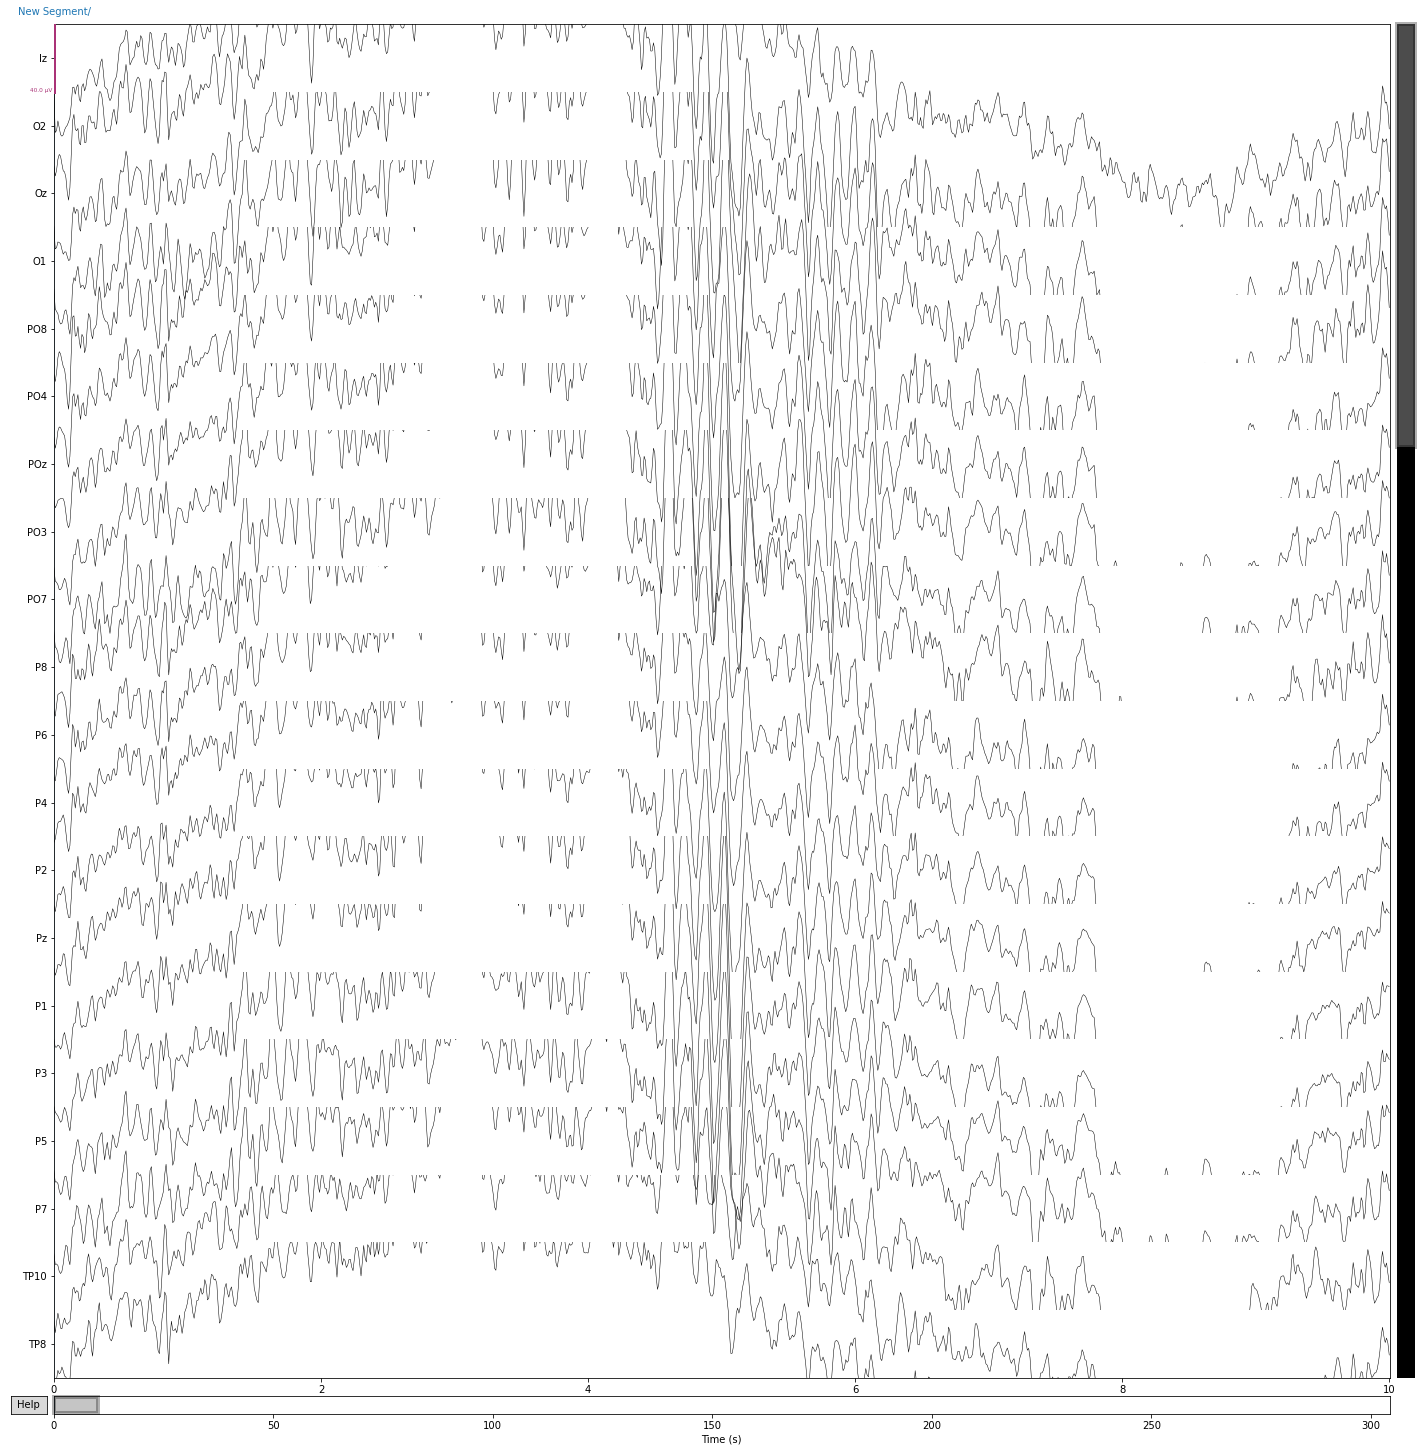

In [20]:
ica_ec.apply(reconst_raw_ec, exclude = ica_ec.exclude).plot()

In [ ]:
reconst_raw_ec.plot(n_channels = 62)

In [21]:
# Fit ICA on sedition 1 state data
ica_sed_1 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_sed_1 = raw_sed_1_filt.copy()

ica_sed_1.fit(reconst_raw_sed_1, picks=picks_sed_1)

<ICA | raw data decomposition, method: fastica (fit in 76 iterations on 152890 samples), 20 ICA components explaining 99.1 % of variance (62 PCA components available), channel types: eeg, no sources marked for exclusion>

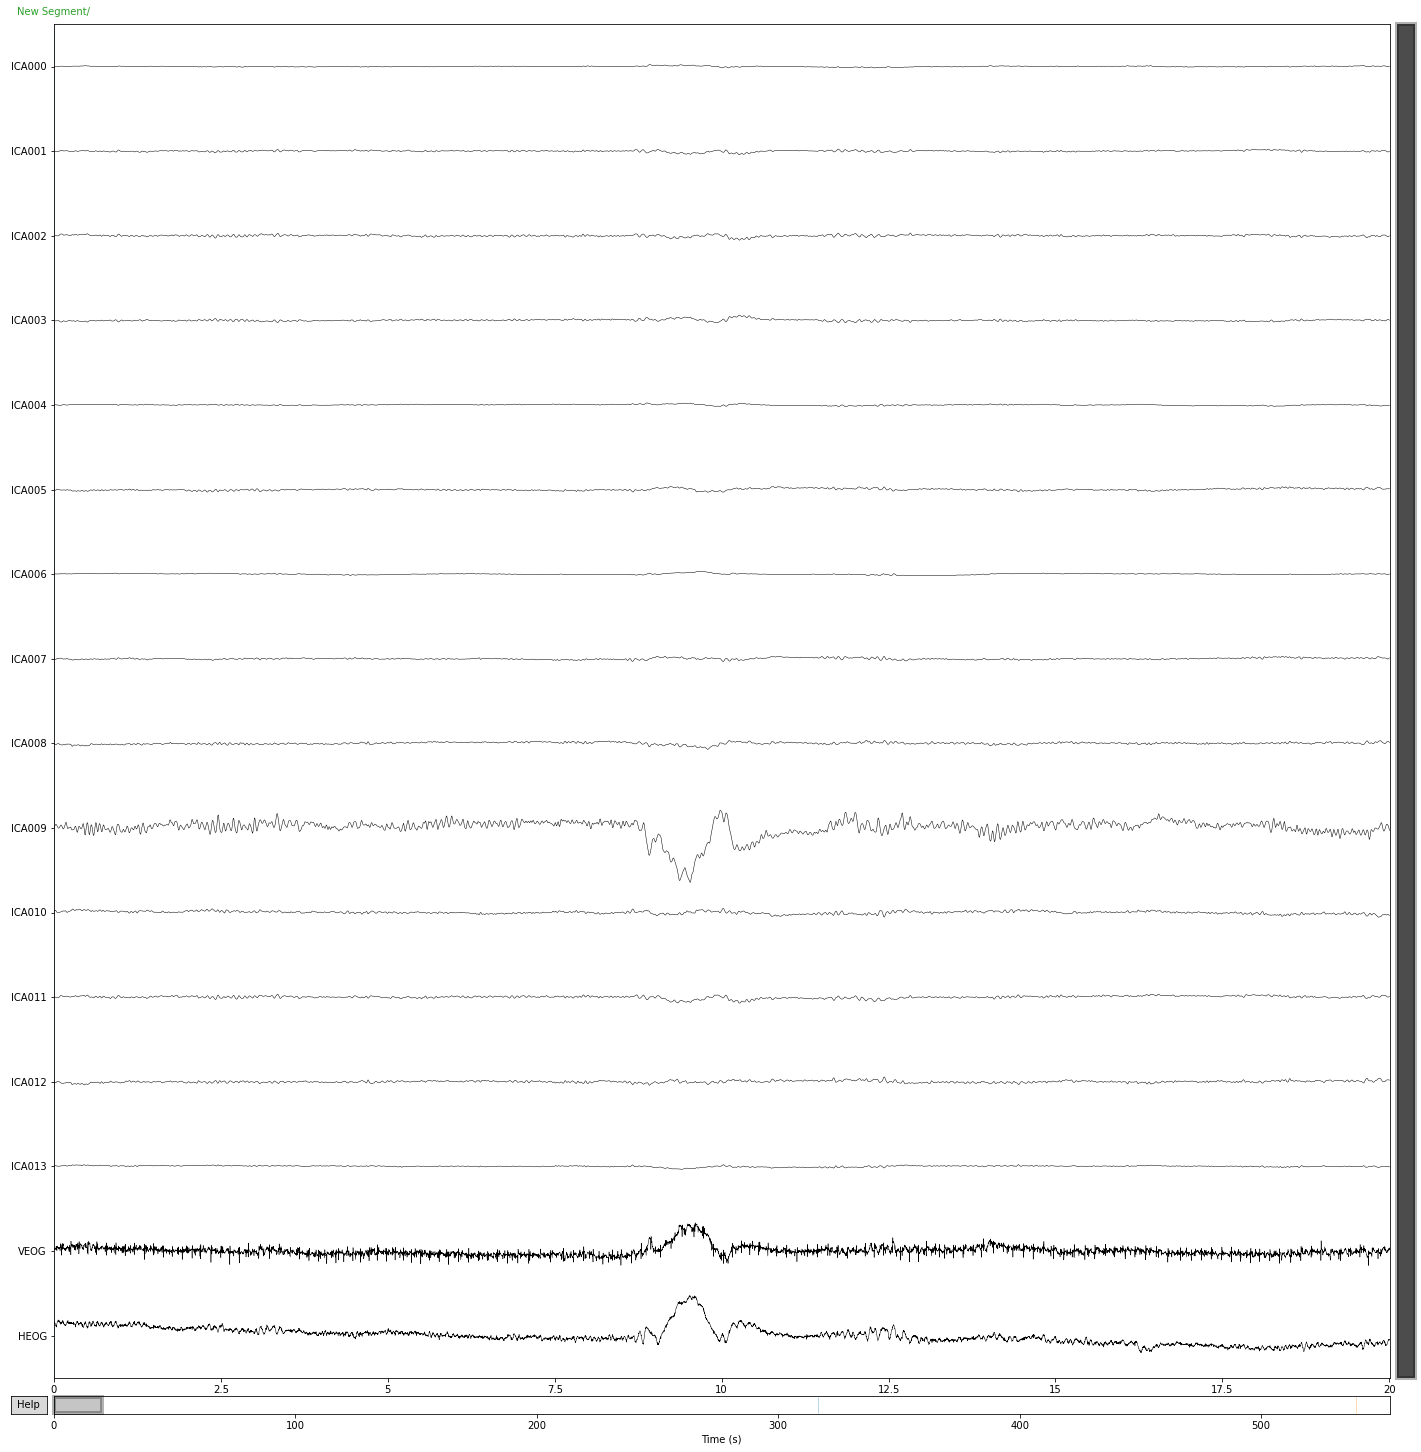

In [21]:
ica_sed_1.plot_sources(reconst_raw_sed_1)

In [22]:
ica_comp_labels_sed_1 = label_components(reconst_raw_sed_1, ica_sed_1, method='iclabel')
ica_comp_labels_sed_1

{'y_pred_proba': array([0.81435347, 0.8803408 , 0.9853563 , 0.9531019 , 0.7565391 ,
        0.88751733, 0.93611366, 0.9959014 , 0.5836439 , 0.9871384 ,
        0.9650353 , 0.67409706, 0.41282928, 0.5134356 , 0.92907065,
        0.9640981 , 0.5112122 , 0.38187367, 0.7700103 , 0.45359835],
       dtype=float32),
 'labels': ['brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'other',
  'brain',
  'brain',
  'brain',
  'other',
  'brain',
  'brain',
  'other']}

In [23]:
ica_sed_1.exclude = []

for i, each in enumerate(ica_comp_labels_sed_1['labels']):
    if (each =='eye blink') or (each.endswith('noise') or (each == 'muscle artifact')):
        ica_sed_1.exclude.append(i)
        
ica_sed_1.exclude

[]

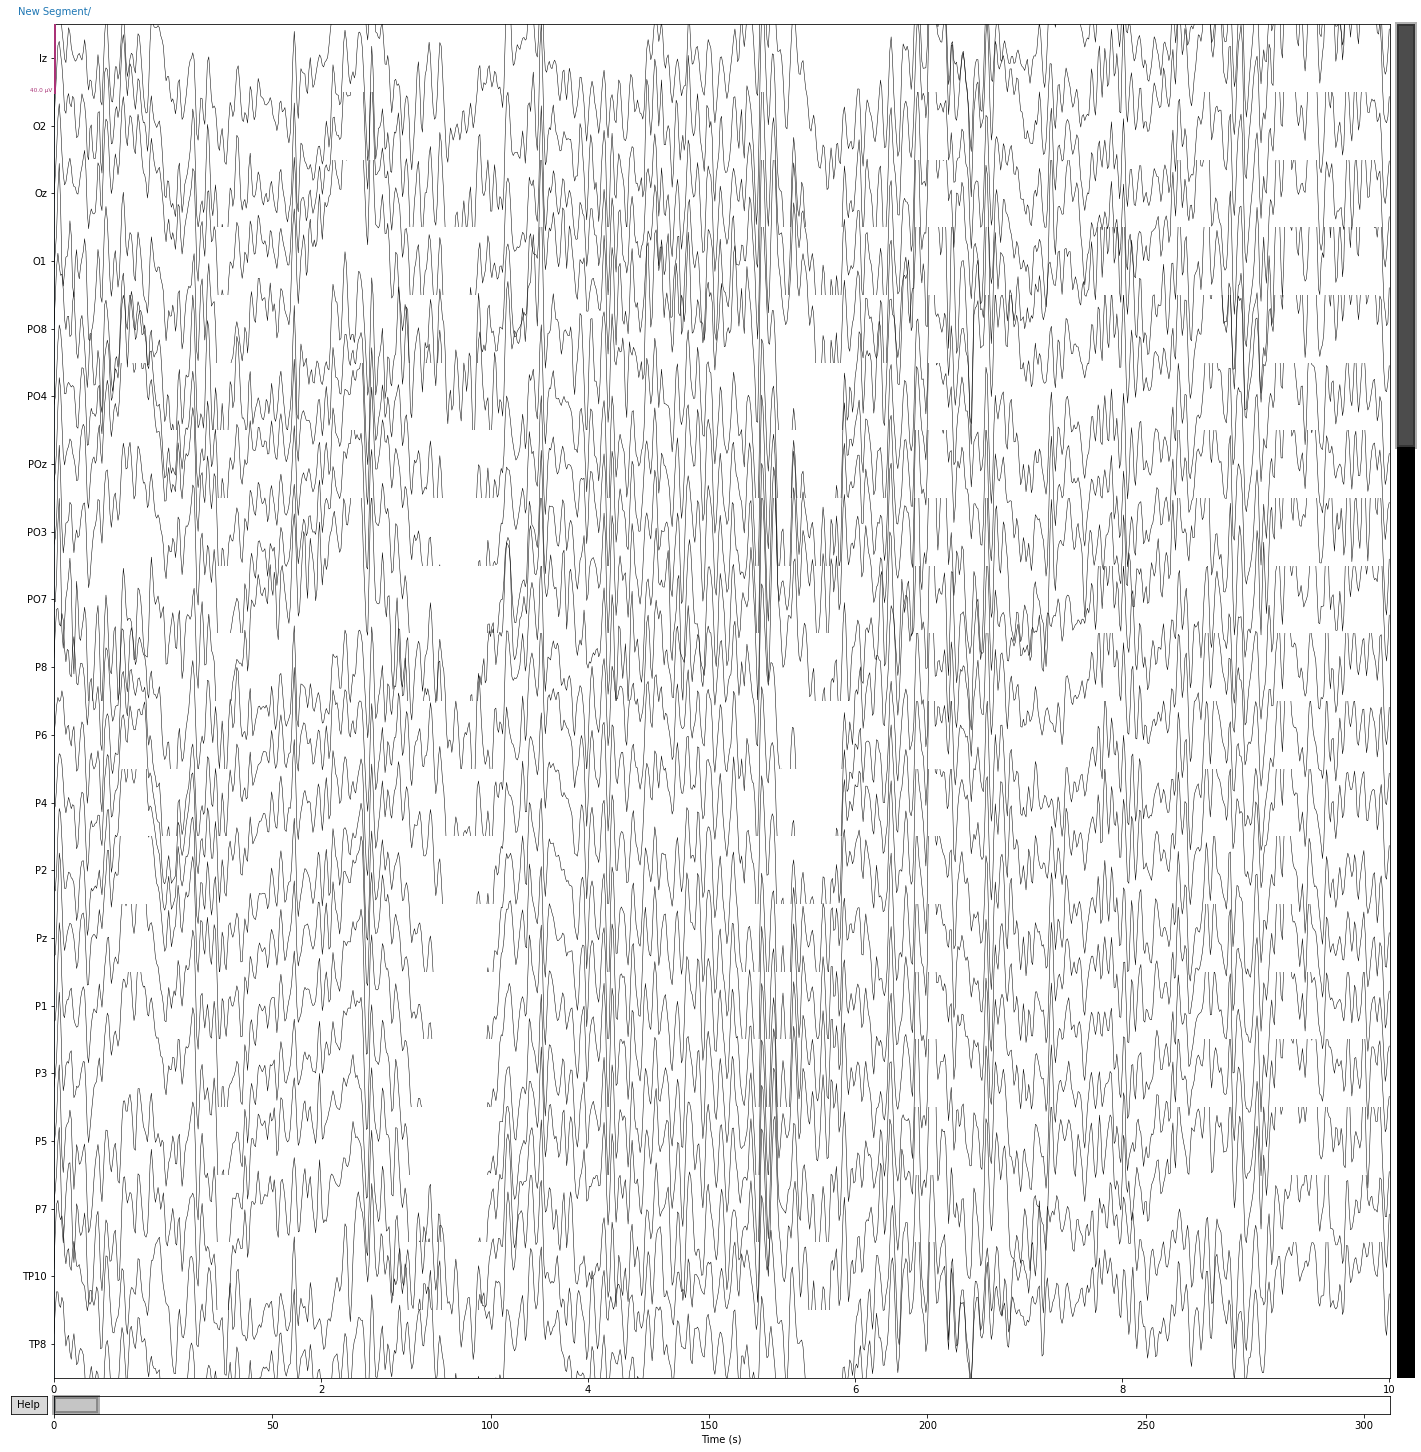

In [24]:
ica_sed_1.apply(reconst_raw_sed_1, exclude = ica_sed_1.exclude).plot()

In [ ]:
reconst_raw_sed_1.plot(n_channels = 62)

In [25]:
# Fit ICA for sedition 2 state
ica_sed_2 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

reconst_raw_sed_2 = raw_sed_2_filt.copy()

ica_sed_2.fit(reconst_raw_sed_2, picks=picks_sed_2)

<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 13490 samples), 17 ICA components explaining 99.1 % of variance (62 PCA components available), channel types: eeg, no sources marked for exclusion>

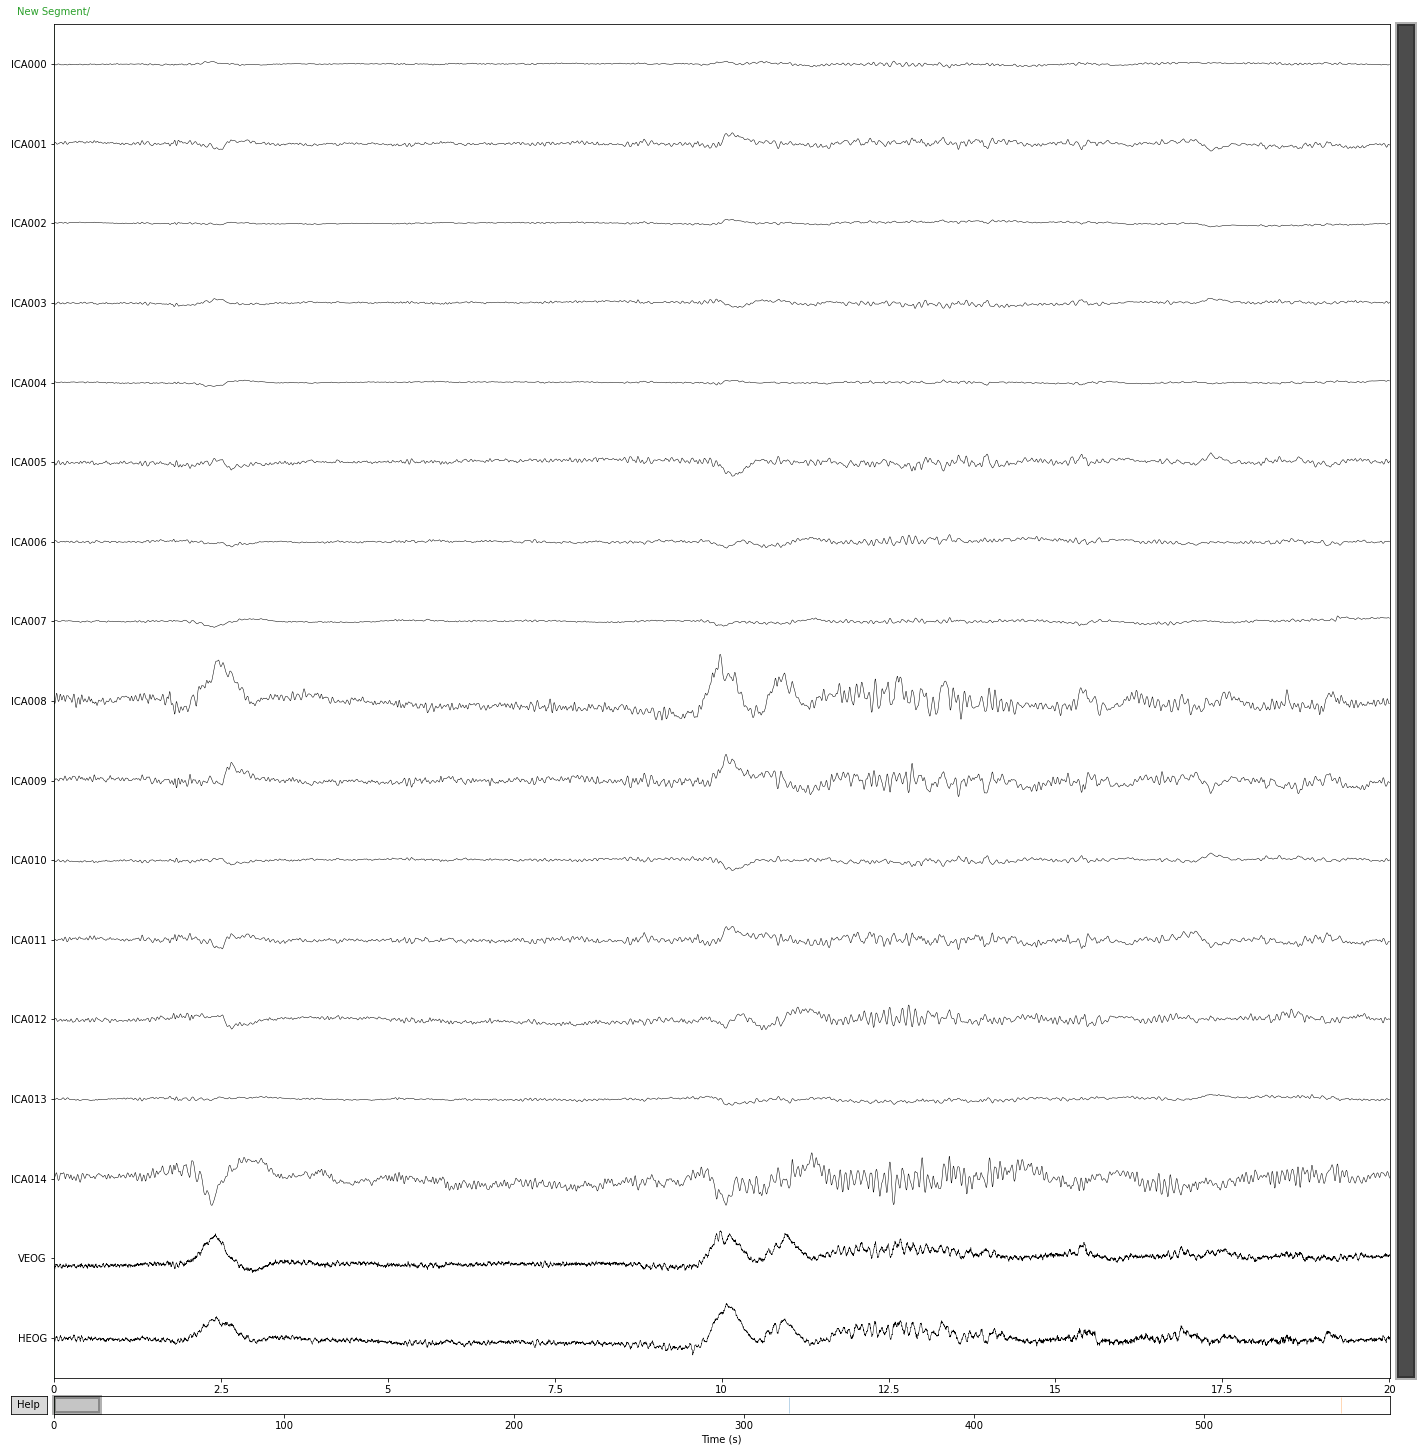

In [26]:
ica_sed_2.plot_sources(reconst_raw_sed_2)

In [26]:
ica_comp_labels_sed_2 = label_components(reconst_raw_sed_2, ica_sed_2, method='iclabel')
ica_comp_labels_sed_2

{'y_pred_proba': array([0.9473981 , 0.9706786 , 0.9386183 , 0.9979718 , 0.9820811 ,
        0.90914994, 0.99836236, 0.9378813 , 0.9793708 , 0.9724574 ,
        0.7149428 , 0.62232363, 0.98846245, 0.9032798 , 0.65687054,
        0.9722738 , 0.50102204], dtype=float32),
 'labels': ['brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'other',
  'brain',
  'other']}

In [27]:
ica_sed_2.exclude = []

for i, each in enumerate(ica_comp_labels_sed_2['labels']):
    if (each =='eye blink') or (each.endswith('noise')):
        ica_sed_2.exclude.append(i)
        
ica_sed_2.exclude

[]

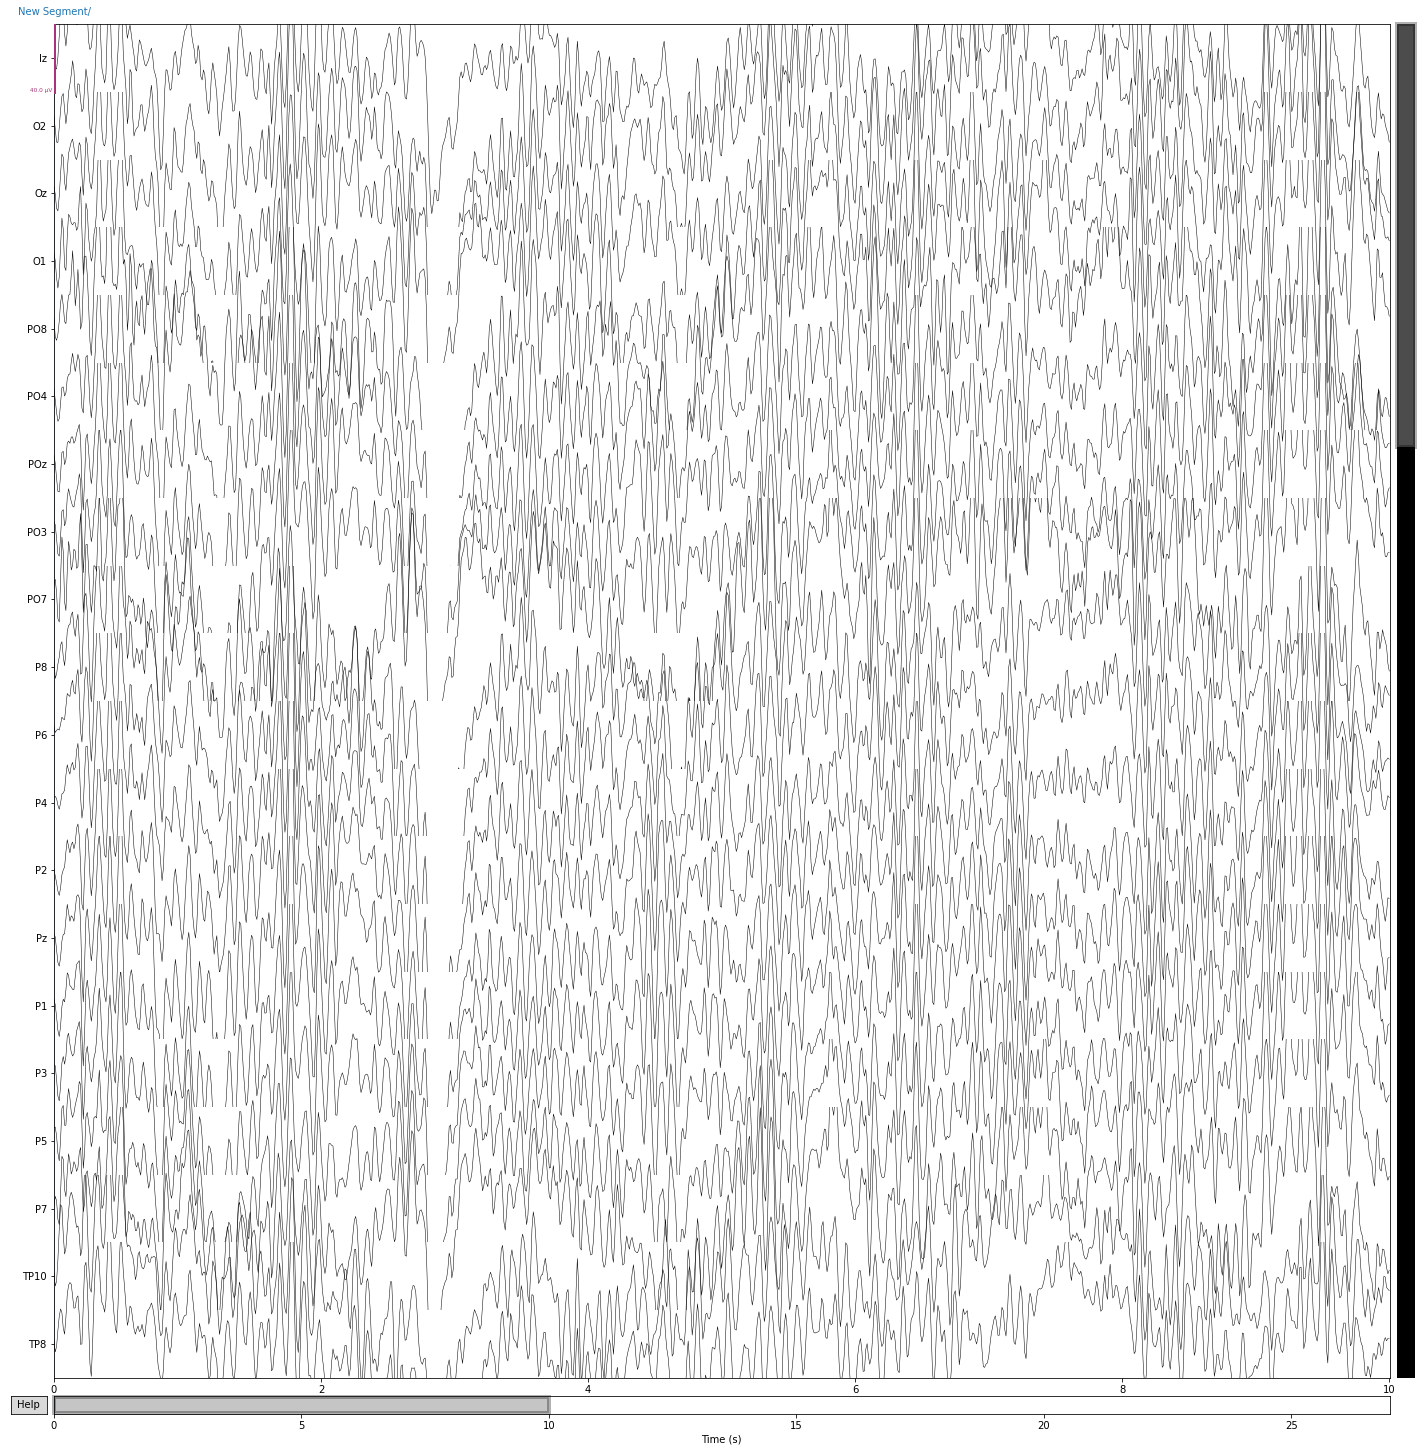

In [28]:
ica_sed_2.apply(reconst_raw_sed_2, exclude = ica_sed_2.exclude).plot()

In [30]:
# # # Fit ICA for sedition state 3 data
# ica_sed_3 = mne.preprocessing.ICA(n_components=ica_n_components,random_state=random_state)

# reconst_raw_sed_3 = raw_sed_3_filt.copy()

# ica_sed_3.fit(reconst_raw_sed_3, picks=picks_sed_3)

<ICA | raw data decomposition, method: fastica (fit in 29 iterations on 221500 samples), 9 ICA components explaining 99.0 % of variance (62 PCA components available), channel types: eeg, no sources marked for exclusion>

In [ ]:
# ica_sed_3.plot_sources(reconst_raw_sed_3)

In [31]:
# ica_comp_labels_sed_3 = label_components(reconst_raw_sed_3, ica_sed_3, method='iclabel')
# ica_comp_labels_sed_3

{'y_pred_proba': array([0.8158058 , 0.4157756 , 0.47113153, 0.51611143, 0.43693584,
        0.3784926 , 0.5085026 , 0.99839735, 0.9761332 ], dtype=float32),
 'labels': ['brain',
  'brain',
  'brain',
  'brain',
  'brain',
  'other',
  'channel noise',
  'brain',
  'brain']}

In [32]:
# ica_sed_3.exclude = []

# for i, each in enumerate(ica_comp_labels_sed_3['labels']):
#     if (each =='eye blink') or (each.endswith('noise')):
#         ica_sed_3.exclude.append(i)
        
# ica_sed_3.exclude

[6]

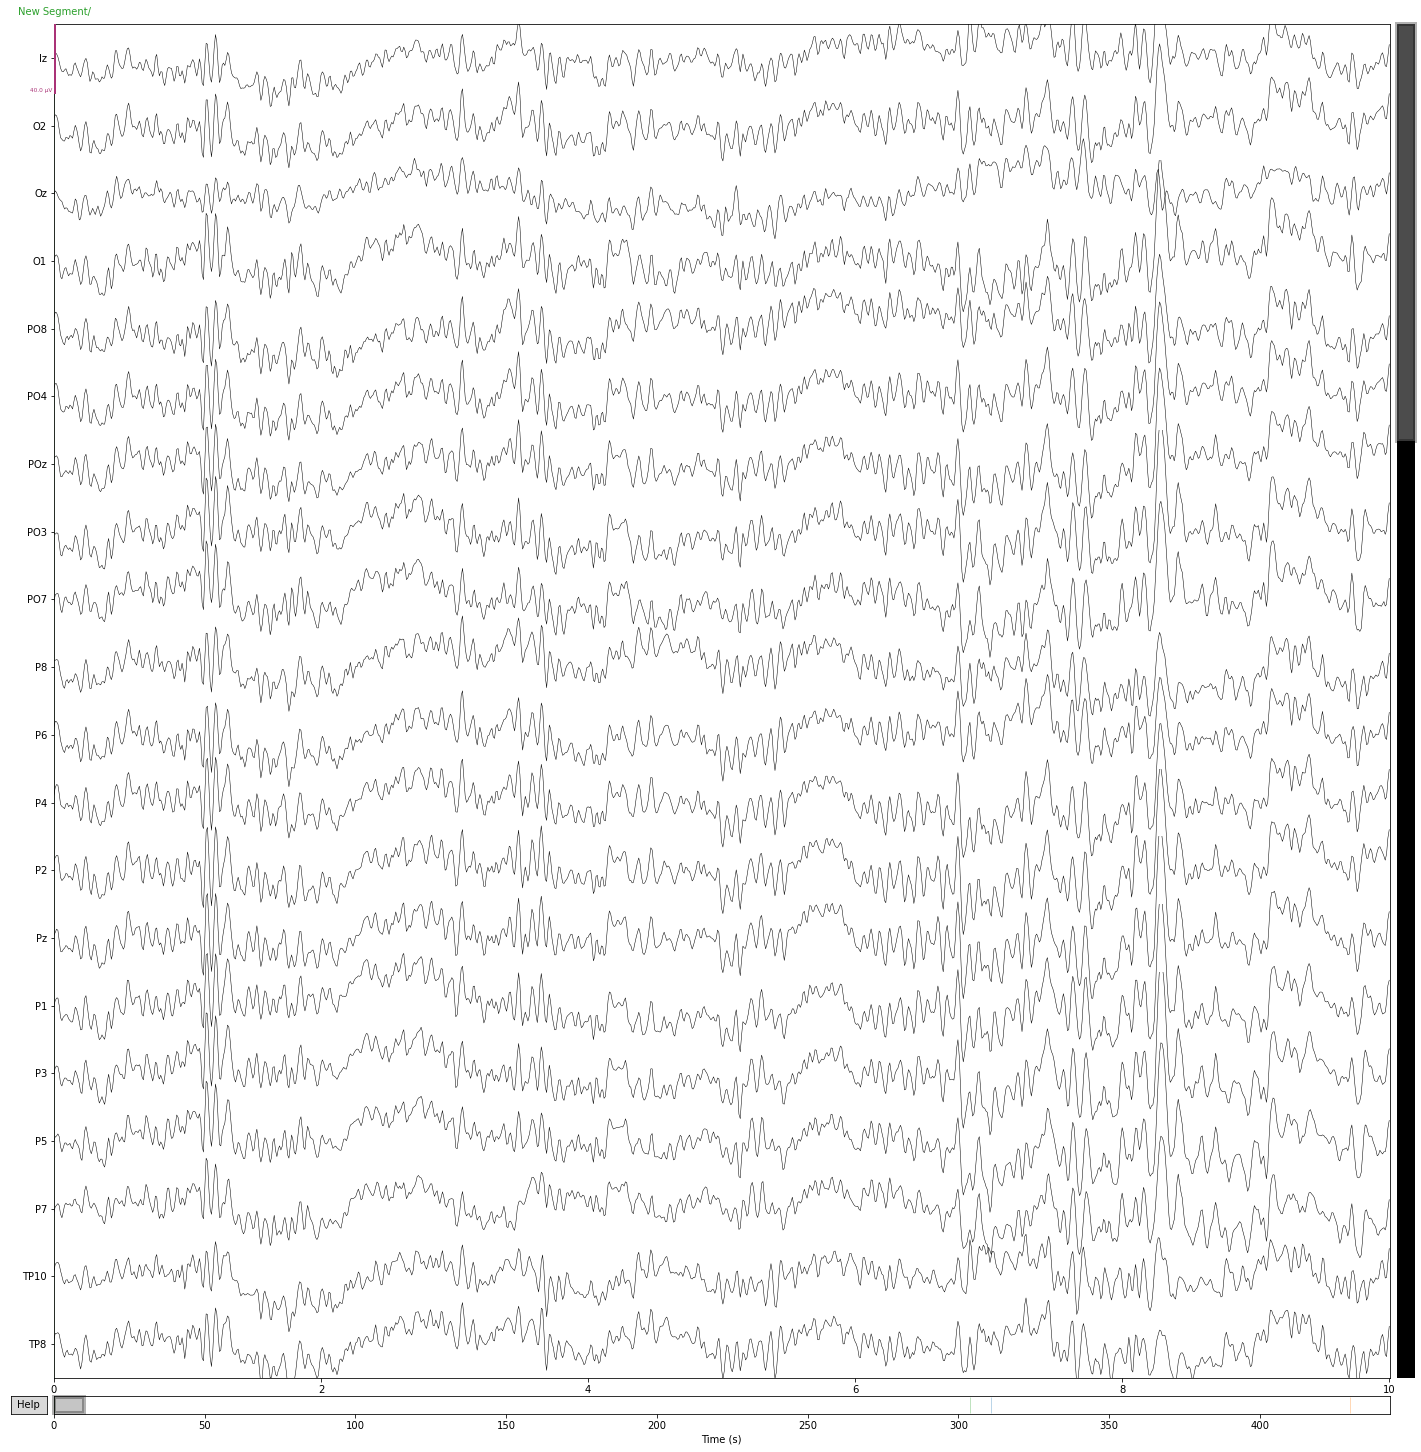

In [33]:
# ica_sed_3.apply(reconst_raw_sed_3, exclude = ica_sed_3.exclude).plot()

In [ ]:
ica_eo.plot_components(outlines = 'skirt')

In [ ]:
ica_ec.plot_components(outlines = 'skirt')

In [34]:
ica_sed_1.plot_components(outlines = 'skirt')

[<MNEFigure size 702x696 with 20 Axes>]

In [ ]:
ica_sed_2.plot_components(outlines = 'skirt')

In [ ]:
# ica_sed_3.plot_components(outlines = 'skirt')

In [ ]:
ica_hi_cut  = 30

In [ ]:
ica_eo.plot_properties(raw_eo_filt, picks=range(0, ica_eo.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_ec.plot_properties(raw_ec_ica_epoch, picks=range(0, ica_ec.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_1.plot_properties(raw_sed_1_ica_epoch, picks=range(0, ica_sed_1.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_2.plot_properties(raw_sed_2_ica_epoch, picks=range(0, ica_sed_2.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_sed_3.plot_properties(raw_sed_3_ica_epoch, picks=range(0, ica_sed_3.n_components_), psd_args={'fmax': ica_hi_cut});

In [ ]:
ica_z_thresh = 1.96 
eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo, ch_name=['VEOG', 'HEOG', 'EMG'], threshold=ica_z_thresh)
ica_eo.exclude = eog_indices

ica_eo.plot_scores(eog_scores)

In [ ]:
ica_eo.plot_sources(raw_eo_filt)

In [ ]:
ica_sed_1.plot_sources(raw_sed_1_filt)

In [ ]:
ica_eo.plot_properties(raw_eo_filt, picks=range(0, ica_eo.n_components_));

In [ ]:
ica_sed_1.exclude = []

# find which ICs match the EOG pattern
eog_indices, eog_scores = ica_sed_1.find_bads_eog(reconst_raw_sed_1)
ica_sed_1.exclude = eog_indices
ica_sed_1.exclude

In [ ]:
# barplot of ICA component "EOG match" scores
ica_eo.plot_scores(eog_scores)

In [ ]:
# barplot of ICA component "EOG match" scores
ica_sed_1.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_eo.find_bads_eog(reconst_raw_eo, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_eo.exclude = eog_indices
ica_eo.exclude

ica_eo.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_sed_2.find_bads_eog(raw_sed_2_ica, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_sed_2.exclude = eog_indices

ica_sed_2.plot_scores(eog_scores)

In [ ]:
eog_indices, eog_scores = ica_sed_3.find_bads_eog(raw_sed_3_ica, ch_name=['VEOG', 'HEOG'], threshold=ica_z_thresh)
ica_sed_3.exclude = eog_indices

ica_sed_3.plot_scores(eog_scores)

In [ ]:
ica_eo.save('ane_SD_EMG_1010-eo-ica.fif',overwrite=True);

In [ ]:
ica_sed_1.save('ane_SD_EMG_1010-sed-1-ica.fif',overwrite=True);

In [ ]:
ica_sed_2.save('ane_SD_EMG_1010-sed-2-ica.fif',overwrite=True);

In [ ]:
ica_sed_3.save('ane_SD_EMG_1010-sed-3-ica.fif',overwrite=True);

In [ ]:
events_eo, event_id_eo = mne.events_from_annotations(reconst_raw_eo)

In [ ]:
events_ec, event_id_ec = mne.events_from_annotations(reconst_raw_ec)

In [ ]:
events_sed_1, event_id_sed_1 = mne.events_from_annotations(reconst_raw_sed_1)

In [ ]:
events_sed_2, event_id_sed_2 = mne.events_from_annotations(reconst_raw_sed_2)

In [ ]:
events_sed_3, event_id_sed_3 = mne.events_from_annotations(reconst_raw_sed_3)

In [ ]:
events_eo,events_ec,events_sed_1,events_sed_2,events_sed_3

In [ ]:
event_id_eo,event_id_ec,event_id_sed_1,event_id_sed_2,event_id_sed_3

In [ ]:
# Epoching settings
tmin =  0  # start of each epoch (in sec)
tmax =  3 # end of each epoch (in sec)

# Create epochs
epochs_eo = mne.Epochs(reconst_raw_eo,
                    events_eo, event_id_eo,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_ec = mne.Epochs(reconst_raw_ec,
                    events_ec, event_id_ec,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_1 = mne.Epochs(reconst_raw_sed_1,
                    events_sed_1, event_id_sed_1,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_2 = mne.Epochs(reconst_raw_sed_2,
                    events_sed_2, event_id_sed_2,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

epochs_sed_3 = mne.Epochs(reconst_raw_sed_3,
                    events_sed_3, event_id_sed_3,
                    tmin, tmax,
                    baseline=None, 
                    preload=True
                   )

In [ ]:
for epoch in epochs_sed_1[:10]:
    print(type(epoch))

In [ ]:
for index in range(10):
    print(type(epochs_sed_1[index]))

In [ ]:
epochs_eo_train = epochs_eo.copy().crop(tmin=1., tmax=3.)

In [ ]:
epochs_sed_1_train = epochs_sed_1.copy().crop(tmin=1., tmax=2.)

In [ ]:
epochs_sed_2_train = epochs_sed_2.copy().crop(tmin=1., tmax=2.)

In [ ]:
epochs_sed_3_train = epochs_sed_3.copy().crop(tmin=1., tmax=2.)

In [ ]:
labels_eo = epochs_eo.events[:, -1] - 2

In [ ]:
labels_eo

In [ ]:
labels_sed_1 = epochs_sed_1.events[:, -1] - 2

In [ ]:
labels_sed_1[0]

In [ ]:
labels_sed_2 = epochs_sed_2.events[:, -1] - 2

In [ ]:
labels_sed_2[0]

In [ ]:
labels_sed_3 = epochs_sed_3.events[:, -1] - 2

In [ ]:
labels_sed_3[0]

In [29]:
# Creating fixed length epochs of 5 seconds.
epochs_eo = mne.make_fixed_length_epochs(reconst_raw_eo, duration=1, overlap= 0.5, preload=False)
epochs_ec = mne.make_fixed_length_epochs(reconst_raw_ec, duration=1, overlap= 0.5,  preload=False)
epochs_sed_1 = mne.make_fixed_length_epochs(reconst_raw_sed_1, duration=1, overlap= 0.5, preload=False)
epochs_sed_2 = mne.make_fixed_length_epochs(reconst_raw_sed_2, duration=1, overlap= 0.5, preload=False)
# epochs_sed_3 = mne.make_fixed_length_epochs(reconst_raw_sed_3, duration=1, overlap= 0.5, preload=False)

In [30]:
# Fetching psd data from each epoch and only pick 'eeg' channels
eo_psd_data, eo_freqs = mne.time_frequency.psd_welch(epochs_eo, fmin=0, fmax=30, picks ='eeg')
ec_psd_data, ec_freqs = mne.time_frequency.psd_welch(epochs_ec, fmin=0, fmax=30, picks ='eeg')
sed_1_psd_data, sed_1_freqs = mne.time_frequency.psd_welch(epochs_sed_1, fmin=0, fmax=30, picks ='eeg')
sed_2_psd_data, sed_2_freqs = mne.time_frequency.psd_welch(epochs_sed_2, fmin=0, fmax=30, picks ='eeg')
# sed_3_psd_data, sed_3_freqs = mne.time_frequency.psd_welch(epochs_sed_3, fmin=0, fmax=30, picks ='eeg')

In [31]:
# returned psds will be of shape (n_epochs, n_channels, n_freqs)
eo_psd_data.shape,ec_psd_data.shape,sed_1_psd_data.shape,sed_2_psd_data.shape,
# sed_3_psd_data.shape

((616, 62, 16), (607, 62, 16), (610, 62, 16), (52, 62, 16))

In [32]:
eo_freqs, ec_freqs, sed_1_freqs, sed_2_freqs,
# sed_3_freqs

(array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]),
 array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
        11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
        23.4375  , 25.390625, 27.34375 , 29.296875]))

In [33]:
#feat_col_X_eo = eo_psd_data.reshape(39,62*16)
feat_col_X_eo = eo_psd_data.reshape(eo_psd_data.shape[0],-1)

#feat_col_X_ec = ec_psd_data.reshape(59,62*16)
feat_col_X_ec = ec_psd_data.reshape(ec_psd_data.shape[0],-1)

#feat_col_X_sed_1 = sed_1_psd_data.reshape(230,62*16)
feat_col_X_sed_1 = sed_1_psd_data.reshape(sed_1_psd_data.shape[0],-1)

#feat_col_X_sed_2 = sed_2_psd_data.reshape(118,62*16)
feat_col_X_sed_2 = sed_2_psd_data.reshape(sed_2_psd_data.shape[0],-1)

#feat_col_X_sed_3 = sed_3_psd_data.reshape(65,62*16)
# feat_col_X_sed_3 = sed_3_psd_data.reshape(sed_3_psd_data.shape[0],-1)

In [34]:
feat_col_X_eo.shape,feat_col_X_ec.shape,feat_col_X_sed_1.shape,feat_col_X_sed_2.shape,
# feat_col_X_sed_3.shape

((616, 992), (607, 992), (610, 992), (52, 992))

In [35]:
types_eo = np.zeros(shape=(eo_psd_data.shape[0], 1), dtype='int')
types_ec = np.zeros(shape=(ec_psd_data.shape[0], 1), dtype='int')
types_sed_1 = np.zeros(shape=(sed_1_psd_data.shape[0], 1), dtype='int')
types_sed_2 = np.zeros(shape=(sed_2_psd_data.shape[0], 1), dtype='int')
# types_sed_3 = np.zeros(shape=(sed_3_psd_data.shape[0], 1), dtype='int')

In [36]:
eyes_open_df = pd.DataFrame(feat_col_X_eo)
eyes_closed_df = pd.DataFrame(feat_col_X_ec)
sed_1_df = pd.DataFrame(feat_col_X_sed_1)
sed_2_df = pd.DataFrame(feat_col_X_sed_2)
# sed_3_df = pd.DataFrame(feat_col_X_sed_3)

In [37]:
eyes_open_df['target'] = types_eo

eyes_closed_df['target'] = types_ec
eyes_closed_df['target'] = 1

sed_1_df['target'] = types_sed_1
sed_1_df['target'] = 2

sed_2_df['target'] = types_sed_2
sed_2_df['target'] = 2

# sed_3_df['target'] = types_sed_3
# sed_3_df['target'] = 2

In [38]:
eyes_open_df

0             1             2             3             4  \
0    4.183611e-13  2.481196e-12  1.001380e-13  1.524371e-12  6.465680e-13   
1    5.108669e-13  3.880556e-12  7.609730e-12  2.314512e-12  8.527230e-13   
2    3.136471e-12  7.694498e-12  1.321419e-12  3.299620e-12  1.558665e-12   
3    3.993726e-10  2.259352e-09  1.696122e-09  5.967117e-10  1.603407e-10   
4    1.374905e-12  1.123863e-11  1.862798e-11  3.141307e-12  1.341276e-12   
..            ...           ...           ...           ...           ...   
611  1.374235e-10  6.654351e-10  2.460427e-10  7.734660e-11  1.242740e-10   
612  7.748340e-12  2.420958e-11  6.840566e-11  2.599427e-10  9.328500e-11   
613  2.843985e-16  2.184213e-11  8.753426e-12  1.471158e-11  1.676906e-12   
614  2.996224e-12  3.846358e-12  1.242204e-11  3.030455e-11  1.903128e-11   
615  5.949618e-12  1.538603e-11  9.645416e-12  4.215264e-12  3.843415e-12   

                5             6             7             8             9  \
0    1.621257e-12  1.026315e-12  5.602098e-13  2.823035e-13  1.312028e-12   
1    2.970818e-12  1.402613e-12  5.579355e-13  1.253203e-12  1.362407e-12   
2    4.764756e-13  2.734076e-13  1.794748e-13  2.954620e-13  2.938637e-13   
3    3.724232e-11  1.375859e-11  1.214585e-11  2.668356e-12  2.562837e-12   
4    3.517691e-12  5.157534e-13  1.434333e-12  1.892788e-12  8.808044e-13   
..            ...           ...           ...           ...           ...   
611  1.018342e-10  1.515742e-11  1.001674e-12  1.833121e-13  1.587385e-13   
612  1.443451e-12  1.447486e-12  3.588587e-12  1.519205e-13  4.673732e-13   
613  7.635622e-13  1.335923e-12  1.254480e-12  3.175634e-13  1.525348e-13   
614  8.224152e-13  6.528580e-13  1.563996e-12  9.329047e-13  1.673188e-13   
615  2.786121e-12  6.469317e-12  6.831341e-12  6.145086e-12  2.012572e-12   

     ...           983           984           985           986  \
0    ...  6.164759e-14  3.038851e-14  1.483453e-13  1.139579e-13   
1    ...  1.464963e-13  8.587501e-14  4.273604e-14  5.874066e-14   
2    ...  5.483795e-14  1.346184e-13  9.831081e-14  1.002725e-13   
3    ...  1.468447e-13  3.454508e-13  5.723386e-14  2.054760e-13   
4    ...  6.686824e-15  5.410484e-14  9.512651e-15  2.125878e-14   
..   ...           ...           ...           ...           ...   
611  ...  1.964052e-14  2.071372e-13  1.650305e-13  1.254206e-13   
612  ...  1.161181e-12  9.063709e-14  1.704974e-12  2.726237e-12   
613  ...  5.169775e-13  2.260044e-13  2.657770e-14  6.219342e-14   
614  ...  3.533245e-14  2.418725e-13  7.542444e-14  2.188998e-13   
615  ...  4.114559e-13  1.189369e-13  9.919263e-14  3.051530e-13   

              987           988           989           990           991  \
0    5.230231e-14  1.074821e-13  5.310091e-13  3.174305e-13  2.512979e-13   
1    6.313806e-14  9.271303e-14  8.878736e-15  2.884166e-13  4.996764e-13   
2    1.741054e-14  2.614660e-13  2.374347e-13  1.997988e-14  1.285530e-14   
3    2.935423e-13  2.020105e-13  1.611158e-13  4.077969e-14  8.894617e-14   
4    6.468429e-14  8.105906e-14  5.883830e-13  5.845209e-13  4.433791e-13   
..            ...           ...           ...           ...           ...   
611  2.368815e-14  2.605264e-13  2.331634e-14  7.964365e-14  5.576179e-13   
612  3.919853e-13  2.443532e-13  3.189420e-13  2.940158e-13  8.466568e-13   
613  1.965083e-13  3.904985e-15  6.817145e-13  6.217663e-13  5.929201e-13   
614  5.658945e-13  4.461363e-13  1.373663e-12  5.325836e-14  5.359970e-13   
615  6.808610e-14  6.669385e-14  2.129406e-13  7.290358e-14  1.529357e-12   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
611       0  
612       0  
613       0  
614       0  
615       0  

[616 rows x 993 columns]

In [ ]:
eyes_closed_df

In [ ]:
sed_1_df

In [ ]:
sed_2_df

In [ ]:
sed_3_df

In [39]:
merged_eo_ec_df = pd.concat([eyes_open_df,eyes_closed_df])

In [180]:
merged_eo_ec_df

0             1             2             3             4  \
0   6.221673e-11  2.708113e-10  1.988190e-10  6.595892e-11  2.467299e-11   
1   3.050501e-11  2.281450e-10  1.263904e-10  5.082864e-11  2.051676e-11   
2   1.821406e-11  2.330558e-10  7.708779e-11  2.402885e-11  1.744523e-11   
3   2.856601e-11  9.699057e-11  1.458020e-11  6.193271e-12  6.289815e-12   
4   2.443484e-11  6.128128e-10  1.276518e-10  2.960904e-11  1.089844e-11   
..           ...           ...           ...           ...           ...   
54  1.194035e-12  1.856094e-11  1.224873e-11  6.699745e-12  4.663092e-12   
55  3.837261e-12  2.194581e-11  1.482719e-11  1.240223e-11  6.118556e-12   
56  3.235712e-12  2.722193e-11  1.451519e-11  9.828164e-12  4.760978e-12   
57  4.471722e-12  2.755775e-11  1.320022e-11  8.491375e-12  5.107617e-12   
58  3.901321e-12  2.394511e-11  1.262687e-11  7.970807e-12  6.514366e-12   

               5             6             7             8             9  ...  \
0   5.791831e-12  2.861620e-12  2.149320e-12  1.886631e-12  1.633367e-12  ...   
1   8.954483e-12  4.463063e-12  3.552935e-12  3.643693e-12  1.268563e-12  ...   
2   1.024318e-11  4.556717e-12  2.541015e-12  1.892040e-12  1.747419e-12  ...   
3   2.805867e-12  1.952808e-12  2.448300e-12  2.753621e-12  8.998937e-13  ...   
4   7.783153e-12  3.609273e-12  3.363311e-12  2.357006e-12  1.334548e-12  ...   
..           ...           ...           ...           ...           ...  ...   
54  2.028497e-12  2.288116e-12  9.785187e-13  6.878995e-13  9.198636e-13  ...   
55  2.780834e-12  2.316730e-12  1.746439e-12  1.401970e-12  1.218218e-12  ...   
56  2.306503e-12  1.613390e-12  1.608661e-12  1.074435e-12  7.567877e-13  ...   
57  3.275905e-12  2.008359e-12  1.612083e-12  2.044324e-12  1.060405e-12  ...   
58  3.146359e-12  3.351484e-12  2.648163e-12  2.314943e-12  1.306509e-12  ...   

             983           984           985           986           987  \
0   1.364087e-13  1.269447e-13  9.552762e-14  1.145142e-13  1.794348e-13   
1   2.329736e-13  1.347200e-13  7.017748e-14  1.339501e-13  1.398989e-13   
2   1.926823e-13  1.962191e-13  1.841094e-13  1.337963e-13  1.922984e-13   
3   1.320666e-13  1.810144e-13  1.793594e-13  1.713772e-13  2.256762e-13   
4   2.583173e-13  2.435579e-13  1.988343e-13  2.383796e-13  1.947280e-13   
..           ...           ...           ...           ...           ...   
54  4.654758e-13  5.961039e-13  3.870637e-13  2.240808e-13  1.559734e-13   
55  8.603094e-13  9.934422e-13  5.607907e-13  4.062888e-13  4.561510e-13   
56  7.823950e-13  8.045875e-13  3.342069e-13  2.917358e-13  3.538168e-13   
57  8.010256e-13  6.772237e-13  3.501143e-13  2.189100e-13  1.474829e-13   
58  9.799623e-13  9.011162e-13  6.601775e-13  4.062193e-13  2.122005e-13   

             988           989           990           991  target  
0   1.746425e-13  1.914201e-13  1.755877e-13  1.933779e-13       0  
1   1.135335e-13  1.730689e-13  1.714775e-13  1.557002e-13       0  
2   1.706787e-13  1.947895e-13  1.595883e-13  1.190438e-13       0  
3   2.250224e-13  1.885702e-13  1.650205e-13  1.228081e-13       0  
4   1.792110e-13  1.992307e-13  1.792365e-13  1.848612e-13       0  
..           ...           ...           ...           ...     ...  
54  1.364710e-13  1.378010e-13  1.785080e-13  1.356882e-13       1  
55  2.267001e-13  1.222498e-13  1.251723e-13  1.047069e-13       1  
56  2.195458e-13  9.535763e-14  1.050191e-13  8.875180e-14       1  
57  1.299157e-13  1.272311e-13  1.153499e-13  8.978310e-14       1  
58  1.471771e-13  1.716248e-13  1.643403e-13  1.301760e-13       1  

[119 rows x 993 columns]

In [40]:
merged_eo_ec_df['target'].value_counts()

0    616
1    607
Name: target, dtype: int64

In [41]:
merged_sed_1_2_df = pd.concat([sed_1_df,sed_2_df])

In [42]:
merged_eo_sed_df = pd.concat([eyes_open_df,merged_sed_1_2_df])

In [43]:
merged_eo_sed_df

0             1             2             3             4  \
0   4.183611e-13  2.481196e-12  1.001380e-13  1.524371e-12  6.465680e-13   
1   5.108669e-13  3.880556e-12  7.609730e-12  2.314512e-12  8.527230e-13   
2   3.136471e-12  7.694498e-12  1.321419e-12  3.299620e-12  1.558665e-12   
3   3.993726e-10  2.259352e-09  1.696122e-09  5.967117e-10  1.603407e-10   
4   1.374905e-12  1.123863e-11  1.862798e-11  3.141307e-12  1.341276e-12   
..           ...           ...           ...           ...           ...   
47  1.657780e-12  6.301359e-12  2.553480e-12  1.173751e-11  3.593032e-11   
48  4.332240e-15  1.681408e-11  5.252453e-12  2.072531e-12  2.191514e-12   
49  6.401690e-12  6.075015e-12  1.633507e-11  2.646709e-11  1.462231e-11   
50  7.913513e-12  3.323736e-11  4.188583e-11  3.265592e-11  3.776511e-11   
51  5.198744e-12  1.049418e-11  7.373520e-11  1.054914e-10  4.087090e-11   

               5             6             7             8             9  ...  \
0   1.621257e-12  1.026315e-12  5.602098e-13  2.823035e-13  1.312028e-12  ...   
1   2.970818e-12  1.402613e-12  5.579355e-13  1.253203e-12  1.362407e-12  ...   
2   4.764756e-13  2.734076e-13  1.794748e-13  2.954620e-13  2.938637e-13  ...   
3   3.724232e-11  1.375859e-11  1.214585e-11  2.668356e-12  2.562837e-12  ...   
4   3.517691e-12  5.157534e-13  1.434333e-12  1.892788e-12  8.808044e-13  ...   
..           ...           ...           ...           ...           ...  ...   
47  4.037918e-11  2.211994e-12  4.212118e-12  2.776912e-12  1.315193e-14  ...   
48  3.758161e-12  2.380143e-12  9.858152e-12  5.436411e-12  3.263914e-12  ...   
49  1.302403e-11  1.611345e-11  1.159667e-11  4.904944e-12  5.146769e-12  ...   
50  1.533976e-10  4.331610e-11  1.422883e-11  1.223145e-11  2.913662e-12  ...   
51  1.199931e-11  1.670255e-10  5.745342e-11  2.620389e-12  1.222240e-12  ...   

             983           984           985           986           987  \
0   6.164759e-14  3.038851e-14  1.483453e-13  1.139579e-13  5.230231e-14   
1   1.464963e-13  8.587501e-14  4.273604e-14  5.874066e-14  6.313806e-14   
2   5.483795e-14  1.346184e-13  9.831081e-14  1.002725e-13  1.741054e-14   
3   1.468447e-13  3.454508e-13  5.723386e-14  2.054760e-13  2.935423e-13   
4   6.686824e-15  5.410484e-14  9.512651e-15  2.125878e-14  6.468429e-14   
..           ...           ...           ...           ...           ...   
47  1.612772e-12  2.972485e-14  9.468710e-15  2.384114e-13  8.599619e-14   
48  1.450074e-12  2.396664e-13  5.314107e-13  5.683045e-13  7.005269e-14   
49  1.093616e-12  3.070482e-13  4.153015e-13  4.453873e-14  2.138217e-13   
50  3.935436e-13  6.854743e-14  2.789135e-13  1.018800e-13  1.218466e-13   
51  7.292221e-12  5.655815e-13  2.363404e-13  1.510870e-13  5.991648e-14   

             988           989           990           991  target  
0   1.074821e-13  5.310091e-13  3.174305e-13  2.512979e-13       0  
1   9.271303e-14  8.878736e-15  2.884166e-13  4.996764e-13       0  
2   2.614660e-13  2.374347e-13  1.997988e-14  1.285530e-14       0  
3   2.020105e-13  1.611158e-13  4.077969e-14  8.894617e-14       0  
4   8.105906e-14  5.883830e-13  5.845209e-13  4.433791e-13       0  
..           ...           ...           ...           ...     ...  
47  4.389025e-13  3.871213e-13  1.706125e-13  1.273511e-13       2  
48  3.525712e-15  1.717529e-15  8.002115e-16  6.745729e-14       2  
49  6.389080e-14  9.137527e-14  1.795412e-13  1.719726e-14       2  
50  2.508537e-13  9.226989e-15  1.005117e-13  2.057633e-14       2  
51  8.367895e-14  9.112574e-14  3.927525e-14  2.119150e-14       2  

[1278 rows x 993 columns]

In [44]:
merged_eo_sed_df['target'].replace(to_replace = 2, value = 1, inplace=True)

In [45]:
merged_ec_sed_df = pd.concat([eyes_closed_df,merged_sed_1_2_df])

In [46]:
merged_ec_sed_df['target'].replace(to_replace = 1, value = 0, inplace=True)
merged_ec_sed_df['target'].replace(to_replace = 2, value = 1, inplace=True)

In [47]:
X_eo_ec = merged_eo_ec_df.values[:, :-1]
X_eo_sed = merged_eo_sed_df.values[:, :-1]
X_ec_sed = merged_ec_sed_df.values[:, :-1]

In [48]:
y_eo_ec = merged_eo_ec_df['target']
y_eo_sed =  merged_eo_sed_df['target']
y_ec_sed = merged_ec_sed_df['target']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_ec_sed, y_ec_sed, test_size=0.3, random_state = 42)

In [145]:
# Function to report accuracy metrics
def accuracy_metrics (conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

# KNN classifier

In [146]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.889763779527559

In [147]:
y_base_pred = knn_clf.predict(X_test)

In [148]:
test_accuracy_knn = accuracy_score(y_test,y_base_pred)*100

print("KKN accuracy for testing dataset without hyper parameter tuning is : {:.2f}%".format(test_accuracy_knn) )

KKN accuracy for testing dataset without hyper parameter tuning is : 88.98%


In [149]:
cf_matrix_knn = confusion_matrix(y_test, y_base_pred)
print(cf_matrix_knn)

[[188   2]
 [ 40 151]]


In [150]:
print(classification_report(y_test, y_base_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       190
           1       0.99      0.79      0.88       191

    accuracy                           0.89       381
   macro avg       0.91      0.89      0.89       381
weighted avg       0.91      0.89      0.89       381



In [151]:
knn_grid = KNeighborsClassifier()

cross_val = StratifiedKFold(n_splits=10)

k_range = list(range(1, 16))
param_grid = {'n_neighbors': k_range, 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']              
             }

# defining parameter range
grid_knn = GridSearchCV(knn_grid, param_grid, cv=cross_val, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_clf = grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [152]:
y_grid_pred = grid_search_clf.predict(X_test)

In [153]:
grid_accuracy_knn = accuracy_score(y_test,y_grid_pred)*100

print("KKN grid search cross validation accuracy is : {:.2f}%".format(grid_accuracy_knn))

KKN grid search cross validation accuracy is : 87.93%


In [154]:
print(classification_report(y_test, y_grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       190
           1       0.97      0.78      0.87       191

    accuracy                           0.88       381
   macro avg       0.89      0.88      0.88       381
weighted avg       0.90      0.88      0.88       381



In [155]:
cf_matrix_knn_grid = confusion_matrix(y_test, y_grid_pred)
print(cf_matrix_knn_grid)

[[186   4]
 [ 42 149]]


In [156]:
accuracy_metrics(cf_matrix_knn_grid)

True Positives: 149
True Negatives: 186
False Positives: 4
False Negatives: 42
--------------------------------------------------
Accuracy: 0.88
Mis-Classification: 0.12
Sensitivity: 0.78
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.87


# LDA classifier

In [157]:
# define model
lda_clf = LDA()

# fit model
lda_clf.fit(X_train, y_train)

# make a prediction
y_pred_lda_clf = lda_clf.predict(X_test)

In [158]:
# evaluate predictions
test_accuracy_lda = accuracy_score(y_test, y_pred_lda_clf)
print("LDA Accuracy: %.2f%%" % (test_accuracy_lda * 100.0))

LDA Accuracy: 81.63%


In [159]:
cf_matrix_lda = confusion_matrix(y_test, y_pred_lda_clf)
print(cf_matrix_lda)

[[173  17]
 [ 53 138]]


In [160]:
print(classification_report(y_test, y_pred_lda_clf))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       190
           1       0.89      0.72      0.80       191

    accuracy                           0.82       381
   macro avg       0.83      0.82      0.81       381
weighted avg       0.83      0.82      0.81       381



In [161]:
cross_val = StratifiedKFold(n_splits=10)

lda_grid = dict()
lda_grid['tol'] = [0.0001,0.0002,0.0003]
lda_grid['solver'] = ['svd']

grid_lda_cv = GridSearchCV(lda_clf, lda_grid, scoring='accuracy', cv=cross_val, n_jobs=-1)
lda_cv_cld = grid_lda_cv.fit(X_train, y_train)

In [162]:
# make a prediction
y_pred_lda_grid = lda_cv_cld.predict(X_test)

# evaluate predictions
tuned_accuracy_lda = accuracy_score(y_test, y_pred_lda_grid)
print("LDA tuned model accuracy: %.2f%%" % (tuned_accuracy_lda * 100.0))

LDA tuned model accuracy: 81.63%


In [163]:
print(classification_report(y_test, y_pred_lda_grid))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       190
           1       0.89      0.72      0.80       191

    accuracy                           0.82       381
   macro avg       0.83      0.82      0.81       381
weighted avg       0.83      0.82      0.81       381



In [164]:
cf_matrix_lda_grid = confusion_matrix(y_test, y_pred_lda_grid)
print(cf_matrix_lda_grid)

[[173  17]
 [ 53 138]]


In [165]:
accuracy_metrics(cf_matrix_lda_grid)

True Positives: 138
True Negatives: 173
False Positives: 17
False Negatives: 53
--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.72
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.81


# GBM Classifier

In [166]:
import lightgbm as lgb
model_gbm = lgb.LGBMClassifier()
model_gbm.fit(X_train, y_train)

# make a prediction
y_pred_gbm = model_gbm.predict(X_test)

In [167]:
# Classification report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       190
           1       0.97      1.00      0.98       191

    accuracy                           0.98       381
   macro avg       0.98      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



In [168]:
cf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print(cf_matrix_gbm)

[[184   6]
 [  0 191]]


In [169]:
cross_val = StratifiedKFold(n_splits=10)

params_gbm = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth":[3,5,8],
    "n_estimators":[10]
    }

grid_gbm_cv = GridSearchCV(model_gbm, params_gbm, scoring='accuracy', cv=cross_val, n_jobs=-1)
gbm_cv_clf = grid_gbm_cv.fit(X_train, y_train)

In [170]:
# make a prediction
y_pred_gbm_grid = gbm_cv_clf.predict(X_test)

# evaluate predictions
tuned_accuracy_gbm = accuracy_score(y_test, y_pred_gbm_grid)
print("GBM tuned model accuracy: %.2f%%" % (tuned_accuracy_gbm * 100.0))

GBM tuned model accuracy: 96.06%


In [171]:
print(classification_report(y_test, y_pred_gbm_grid))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       190
           1       0.93      1.00      0.96       191

    accuracy                           0.96       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.96      0.96      0.96       381



In [172]:
cf_matrix_gbm_grid = confusion_matrix(y_test, y_pred_gbm_grid)
print(cf_matrix_gbm_grid)

[[175  15]
 [  0 191]]


In [173]:
accuracy_metrics(cf_matrix_gbm_grid)

True Positives: 191
True Negatives: 175
False Positives: 15
False Negatives: 0
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 1.0
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.96


# XG Boost Classification

In [174]:
xgb_model = XGBClassifier()

In [175]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
# make predictions for test data
y_xgb_pred = xgb_model.predict(X_test)

In [177]:
# evaluate predictions
test_accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
print("Accuracy: %.2f%%" % (test_accuracy_xgb * 100.0))

Accuracy: 98.16%


In [178]:
cf_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
print(cf_matrix_xgb)

[[184   6]
 [  1 190]]


In [179]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       191

    accuracy                           0.98       381
   macro avg       0.98      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



In [180]:
# defining parameter range
param_grid_xgb = {"subsample":[0.5, 1],
              "max_depth":[4, 12],
              "learning_rate":[0.3, 0.1],
              "n_estimators":[100]}

cross_val = StratifiedKFold(n_splits=10)
model_grid = XGBClassifier()
 
grid_xgb = GridSearchCV(model_grid, param_grid_xgb, verbose = 3, cv = cross_val)
 
# fitting the model for grid search
grid_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.966 total time=   0.6s
[CV 2/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.966 total time=   0.6s
[CV 3/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=1.000 total time=   0.7s
[CV 4/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.966 total time=   1.2s
[CV 5/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.989 total time=   1.0s
[CV 6/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.966 total time=   0.7s
[CV 7/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.989 total time=   1.2s
[CV 8/10] END learning_rate=0.3, max_depth=4, n_estimators=100, subsample=0.5;, score=0.966 total time=   0.7s
[CV 9/10] END learning_rate=0.3, max_depth=4, n_est

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interact...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [181]:
# make a prediction
y_pred_xgb_grid = grid_xgb.predict(X_test)

# evaluate predictions
tuned_accuracy_xgb = accuracy_score(y_test, y_pred_xgb_grid)
print("XGB tuned model accuracy: %.2f%%" % (tuned_accuracy_xgb * 100.0))

XGB tuned model accuracy: 98.69%


In [182]:
print(classification_report(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       190
           1       0.97      1.00      0.99       191

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



In [183]:
cf_matrix_xgb_grid = confusion_matrix(y_test, y_pred_xgb_grid)
print(cf_matrix_xgb_grid)

[[185   5]
 [  0 191]]


In [184]:
accuracy_metrics(cf_matrix_xgb_grid)

True Positives: 191
True Negatives: 185
False Positives: 5
False Negatives: 0
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 1.0
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.99


# 1D CNN Model

In [185]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [186]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, LSTM, GRU

# Sequential model 
model_cnn = tf.keras.models.Sequential()

#CNN layer 1:
model_cnn.add(Conv1D(filters=32, kernel_size=(3,), input_shape=X_train.shape[1:3], activation='relu'))


#CNN layer 2:
model_cnn.add(Conv1D(filters=64, kernel_size=(3,), activation='relu'))

#CNN layer 3:
model_cnn.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))

#CNN layer 4 including max pooling:
model_cnn.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))

#Dropout layer:
model_cnn.add(Dropout(0.5))

#Flatten layer:
model_cnn.add(Flatten())

#Dense layer 1: 256 neurons
model_cnn.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Dense layer 2: 256 neurons
model_cnn.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Softmax as last layer with 2 outputs
model_cnn.add(Dense(units = 2, activation='softmax'))

model_cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 990, 32)           128       
                                                                 
 conv1d_7 (Conv1D)           (None, 988, 64)           6208      
                                                                 
 conv1d_8 (Conv1D)           (None, 988, 128)          24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 494, 128)         0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 494, 128)          0         
                                                                 
 flatten_2 (Flatten)         (None, 63232)             0         
                                                      

In [187]:
model_cnn_run = model_cnn.fit(X_train, y_train, epochs=10, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/10
89/89 [==============================] - 14s 156ms/step - loss: 0.6933 - accuracy: 0.5124 - val_loss: 0.6950 - val_accuracy: 0.5013
Epoch 2/10
89/89 [==============================] - 14s 155ms/step - loss: 0.6922 - accuracy: 0.5304 - val_loss: 0.6947 - val_accuracy: 0.5013
Epoch 3/10
89/89 [==============================] - 13s 151ms/step - loss: 0.6917 - accuracy: 0.5304 - val_loss: 0.6939 - val_accuracy: 0.5013
Epoch 4/10
89/89 [==============================] - 14s 153ms/step - loss: 0.6922 - accuracy: 0.5304 - val_loss: 0.6944 - val_accuracy: 0.5013
Epoch 5/10
89/89 [==============================] - 13s 150ms/step - loss: 0.6919 - accuracy: 0.5304 - val_loss: 0.6945 - val_accuracy: 0.5013
Epoch 6/10
89/89 [==============================] - 14s 153ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6942 - val_accuracy: 0.5013
Epoch 7/10
89/89 [==============================] - 12s 138ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6949 - val_accuracy: 0.5013

In [188]:
# predict on test data
y_cnn_probs = model_cnn.predict(X_test, verbose=0)
# predict classes on test data
y_cnn_classes = np.argmax(model_cnn.predict(X_test), axis=-1)

In [189]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_cnn_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_cnn_classes)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_cnn_classes)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_cnn_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(y_test, y_cnn_classes)
print(matrix)

Accuracy: 0.501312
Precision: 0.501312
Recall: 1.000000
F1 score: 0.667832
[[  0 190]
 [  0 191]]


In [190]:
accuracy_metrics(matrix)

True Positives: 191
True Negatives: 0
False Positives: 190
False Negatives: 0
--------------------------------------------------
Accuracy: 0.5
Mis-Classification: 0.5
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.0
f_1 Score: 0.0
